<a href="https://colab.research.google.com/github/lucas-porto/Data_science_bootcamp/blob/master/LP_ds_bootcamp_mod_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

---
---
#<font color = #944dff>  **Módulo 1 - Python e Pandas para análise de dados reais**
---
---


---
##<font color = #944dff>  **Aula 1**
---

#### <font color = #8533ff> **1.1.1 - Carregando dados e bibliotecas**

In [ ]:
#necessário instalar o unidecode incialmente, já que o colab não tem built-in
!pip install unidecode

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import numpy as np
from matplotlib.gridspec import GridSpec
import seaborn as sns

from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Este estudo irá tratar sobre os dados por local de internação, porém existem duas opções sobre as datas:



*   Data de atendimento: Este dataset contém números que conforme os meses passam, os números dos meses anteriores podem variar, já que não sabemos quanto tempo demora para um paciente ser atendido, quanto tempo leva pós atendimento e liberação do mesmo para que os dados sejam processados e efetuado os pagamentos.
*   Data de processamento: Quando efetivamente os dados foram dados input no sistema.



Os dados referente ao TABNET, optei por salvá-los no drive a fim de não termos que sempre recarregá-los ao iniciar o notebook.

Um ponto importante é o read_csv tem diferentes opções para melhorarmos o tratamento e carregamento dos dados. Como vimos ao importar os dados inicialmente, precisamos alterar algumas opções:


*   encoding: o  formato utilizado para escrita do arquivo, no nosso caso foi o latin1 'ISO-8859-1'
*   sep: o separador conforme o TABNET era ';', porém verificamos que era apenas ','
*   skiprows: tivemos que pular o cabeçalho do arquivo
*   skipfooter: pulamos algumas informações explicativas que eles informam 
*   thousands: mudamos o separador de milhares para '.'
*   decimal: mudamos o separador de decimais para ','
*   engine: foi necessário incluirmos a engine devido a um softwarning do Colab
*   na_values: '-' foi usado apenas na primeira aula, porém devido a forma de tratar os dados nas outras, tive que retirar.



In [ ]:
arquivo_aula_1 = '/content/drive/My Drive/Estudos/Data Science/Alura/Bootcamp Data Science/Módulo 1/dados/procedimentos_hospitalares_ano_processamento_2008_2020.csv'
arquivo_aula_2 = '/content/drive/My Drive/Estudos/Data Science/Alura/Bootcamp Data Science/Módulo 1/dados/A160324189_28_143_208.csv'
arquivo_estudo_1 = '/content/drive/My Drive/Estudos/Data Science/Alura/Bootcamp Data Science/Módulo 1/dados/dados_ibge_populacao_estado.csv'


dados = pd.read_csv(arquivo_aula_2, encoding='ISO-8859-1',
                    sep=';', skiprows=3, skipfooter =12, 
                    thousands='.', decimal =',',
                    engine='python')



#necessário formatar a apresentação das casas decimais
pd.options.display.float_format = '{:.2f}'.format

#### <font color = #8533ff>**1.1.2 - Analisando os dados**

In [ ]:
#verificando as 5 primeiras linhas
dados.head()

Unidade da Federação 1992/Mar 1992/Abr  ...    2020/Jul     2020/Ago         Total
0          11 Rondônia        -        -  ...  7407388.24   3556381.57  929129659.72
1              12 Acre        -        -  ...  1163813.08            -  420668039.63
2          13 Amazonas        -        -  ... 13358514.02   4726485.73 1771654871.23
3           14 Roraima        -        -  ...  2739498.41   1524478.04  305010883.18
4              15 Pará        -        -  ... 27618727.51  11559714.54 4437115730.71

[5 rows x 280 columns]

In [ ]:
#verificando as 5 últimas linhas
dados.tail()

Unidade da Federação 1992/Mar  ...     2020/Ago          Total
22   43 Rio Grande do Sul        -  ...  28349257.38 11958647088.33
23  50 Mato Grosso do Sul        -  ...   4059220.22  2172157981.36
24         51 Mato Grosso        -  ...   6174224.99  2036923784.59
25               52 Goiás        -  ...  20242641.73  4657348958.66
26    53 Distrito Federal        -  ...  12044848.02  2429933198.76

[5 rows x 280 columns]

In [ ]:
#verificando as principais informações do dataset
#vemos que não temos apenas números, existe um objeto.

#aqui temos o insight que pode haver NaN
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27 entries, 0 to 26
Columns: 280 entries, Unidade da Federação to Total
dtypes: float64(157), object(123)
memory usage: 59.2+ KB


In [ ]:
#vendo a média dos dados.
dados.mean()

2007/Ago       304952.77
2007/Set       788145.26
2007/Out      2440162.96
2007/Nov      5517354.05
2007/Dez     12337159.42
                ...     
2020/Abr     40005678.92
2020/Mai     46769027.82
2020/Jun     45367349.74
2020/Jul     40717083.95
Total      5993724452.01
Length: 157, dtype: float64

#### <font color = #8533ff>**1.1.3 - Analisando os dados faltantes**

In [ ]:
'''

Este tratamento foi executado inicialmente quando estávamos utilizando os dados com data do procedimento,
naquele caso utilizar o na_values ='-' no import, assim com o tratamento abaixo ficava simples encontrar as colunas com valores nulos.

#Identificando os dados nulos
#criando cliente uma selecao para identificar quais colunas tem valor nulo
selecao_nula = dados.isnull().sum() > 0
#verificando na Series criada quais tem valor nulo
selecao_nula = selecao_nula[selecao_nula == True]
#transformado num data frame
selecao_nula = selecao_nula.to_frame()
selecao_nula = selecao_nula.reset_index().rename(columns = {'index': 'Mês'})
selecao_nula = selecao_nula['Mês']

#Aplicando a selecao numa com os nomes dos index que retirei, podemos ver que a mesma unidade da federação
#tem dados nulos, se olharmos nosso dataset principal, podemos ver que é o Estado do Acre.

dados[selecao_nula]

'''


"\n\nEste tratamento foi executado inicialmente quando estávamos utilizando os dados com data do procedimento,\nnaquele caso utilizar o na_values ='-' no import, assim com o tratamento abaixo ficava simples encontrar as colunas com valores nulos.\n\n#Identificando os dados nulos\n#criando cliente uma selecao para identificar quais colunas tem valor nulo\nselecao_nula = dados.isnull().sum() > 0\n#verificando na Series criada quais tem valor nulo\nselecao_nula = selecao_nula[selecao_nula == True]\n#transformado num data frame\nselecao_nula = selecao_nula.to_frame()\nselecao_nula = selecao_nula.reset_index().rename(columns = {'index': 'Mês'})\nselecao_nula = selecao_nula['Mês']\n\n#Aplicando a selecao numa com os nomes dos index que retirei, podemos ver que a mesma unidade da federação\n#tem dados nulos, se olharmos nosso dataset principal, podemos ver que é o Estado do Acre.\n\ndados[selecao_nula]\n\n"

#### <font color = #8533ff>**1.1.4 - Visualizações iniciais**



In [ ]:
dados['2008/Ago']

0      2938286.29
1      1886871.84
2      8331763.97
3      1045291.11
4     23259148.28
5      1550340.63
6      5213290.38
7     14609872.57
8     10645917.52
9     29304821.51
10    10812840.19
11    12673774.35
12    31705296.79
13     9262767.68
14     4543252.50
15    43254543.33
16    80374117.08
17    12384068.19
18    42487939.51
19   179898070.22
20    56699001.13
21    28887854.62
22    56233758.74
23     9602843.49
24     8987811.95
25    21041071.33
26    11548451.89
Name: 2008/Ago, dtype: float64

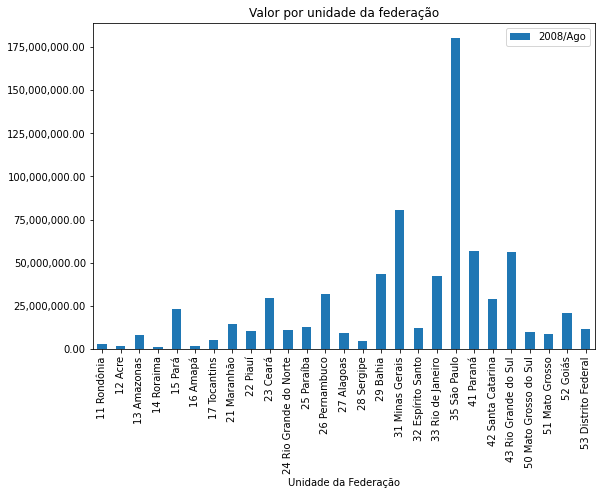

In [ ]:
#plotando um gráfico simples como barra
ax = dados.plot(x='Unidade da Federação', y='2008/Ago', kind='bar', figsize =(9,6))

#formatador da legenda do eixo y, colocando o formato do valor
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.2f}'))

plt.title('Valor por unidade da federação')
plt.show()

### <font color = #1f004d> **Desafios**

#### <font color = #1f004d> **Desafio 01: Escolher um título mais descritivo, que passe a mensagem adequada ao gráfico de barras.** 

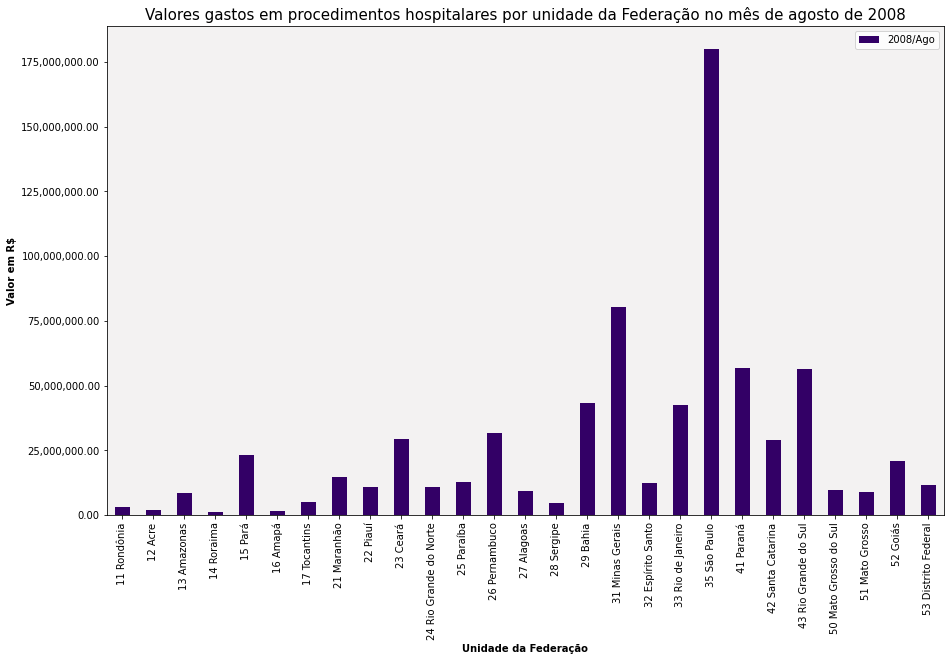

In [ ]:
#@title  <font size = 3 >Código do plot
ax = dados.plot(x='Unidade da Federação', y='2008/Ago', kind='bar', figsize=(15,9), color = '#330066' )


ax.yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.2f}'))

#adicionado legendas
ax.set_ylabel('Valor em R$',color='black', fontweight='bold')
ax.set_xlabel('Unidade da Federação',color='black', fontweight='bold')

#adicionando cores nos eixos
ax.tick_params(axis='x', colors='black')
ax.tick_params(axis='y', colors='black')
#adicionando cor no fundo
ax.set_facecolor("#f3f2f2")

plt.title('Valores gastos em procedimentos hospitalares por unidade da Federação no mês de agosto de 2008', {'fontsize': 15, 'color': 'black'})
plt.show()

#### <font color = #1f004d> **Desafio 02: Realizar a mesma análise da aula para o mês atual.** 

In [ ]:
#selecionando apenas o mês mais recente do dataset e inserido em um dataframe auxiliar
#dados_mes_atual
dados_mes_atual = dados[['Unidade da Federação', '2020/Ago']]


#como vimos anteriormente, o Acre não possui dados do mês de agosto de 2020, iremos zerar o mesmo apenas no dataframe auxiliar para plotarmos o gráfico
dados_mes_atual['2020/Ago'] = dados_mes_atual['2020/Ago'].str.replace('-','0').fillna(0).astype(float)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


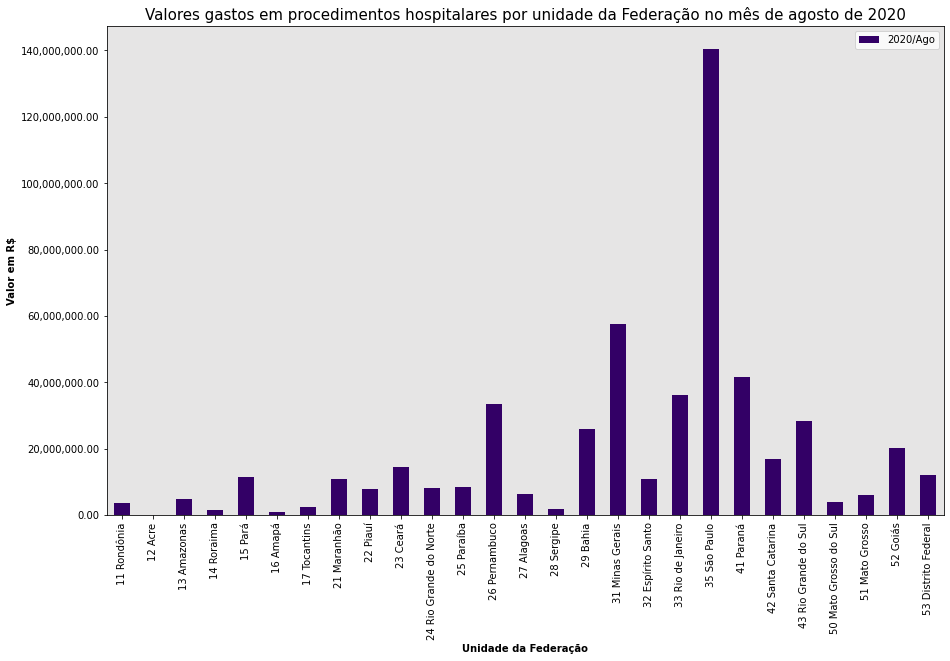

In [ ]:
#@title  <font size = 3 >Código do plot
ax = dados_mes_atual.plot(x='Unidade da Federação', y='2020/Ago', kind='bar', figsize=(15,9), color = '#330066' )


ax.yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.2f}'))

#adicionado legendas
ax.set_ylabel('Valor em R$',color='black', fontweight='bold')
ax.set_xlabel('Unidade da Federação',color='black', fontweight='bold')

#adicionando cores nos eixos
ax.tick_params(axis='x', colors='black')
ax.tick_params(axis='y', colors='black')
#adicionando cor no fundo
ax.set_facecolor("#e6e5e5")

plt.title('Valores gastos em procedimentos hospitalares por unidade da Federação no mês de agosto de 2020', {'fontsize': 15, 'color': 'black'})
plt.show()

#### <font color = #1f004d> **Como seria o comparativo entre Agosto de 2008, 2014 e 2020?** 

In [ ]:
#@title  <font size = 3 >Separando dados dos 3 anos
dados_mes_comparativos = dados[['Unidade da Federação','2008/Ago','2014/Ago','2020/Ago']].sort_values(by = '2008/Ago',ascending=True)
#lembrando que temos dados nulos apenas no agosto de 2020 no Acre
dados_mes_comparativos['2020/Ago'] = dados_mes_comparativos['2020/Ago'].str.replace('-','0').fillna(0).astype(float)

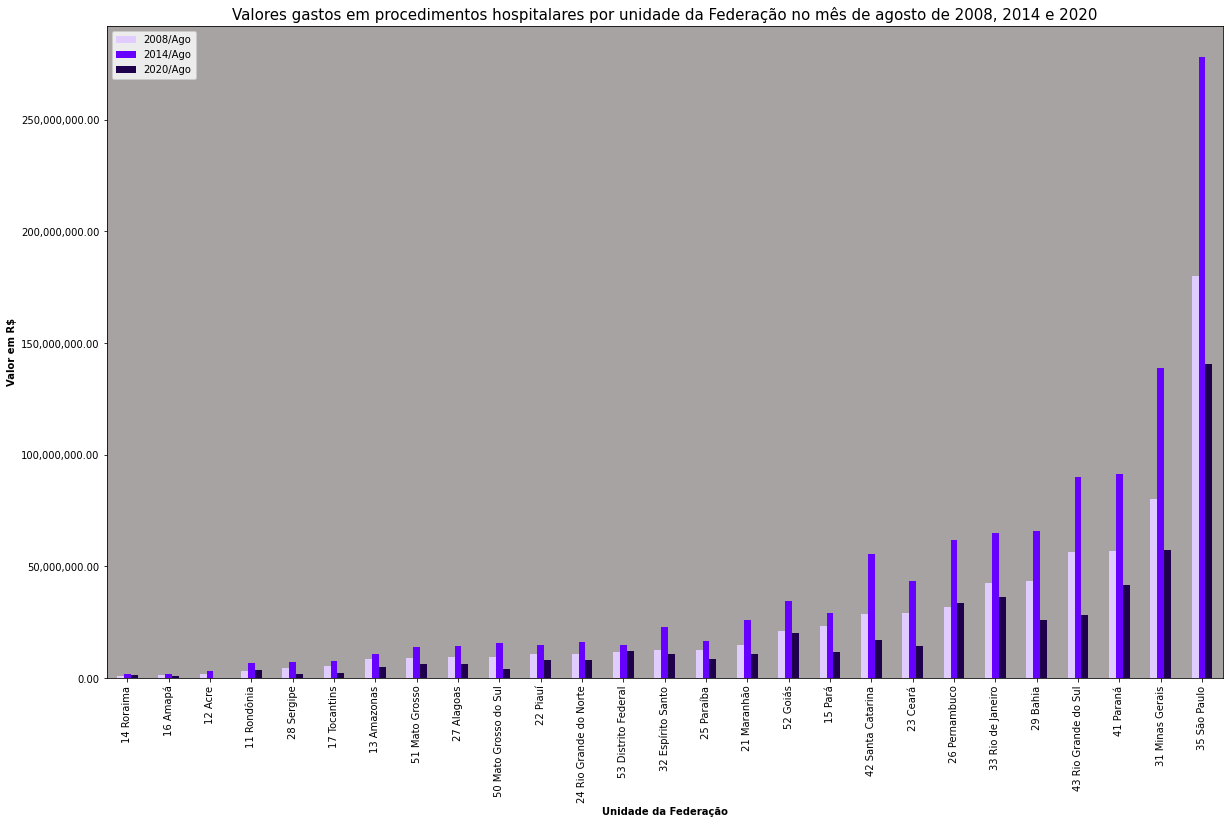

In [ ]:
#@title <font size = 3 > Código do plot
ax = dados_mes_comparativos.plot.bar(x='Unidade da Federação',   figsize=(20,12), color=('#e0ccff','#6600ff','#1f004d'))


ax.yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.2f}'))

#adicionado legendas
ax.set_ylabel('Valor em R$',color='black', fontweight='bold')
ax.set_xlabel('Unidade da Federação',color='black', fontweight='bold')

#adicionando cores nos eixos
ax.tick_params(axis='x', colors='black')
ax.tick_params(axis='y', colors='black')
#adicionando cor no fundo
ax.set_facecolor("#a8a3a3")

plt.title('Valores gastos em procedimentos hospitalares por unidade da Federação no mês de agosto de 2008, 2014 e 2020', {'fontsize': 15, 'color': 'black'})
plt.show()

Esta análise foi executada para os dados de processamento:
Dependendo de como serão nossas análises no futuro, fica já o insight de qual seria o motivo para alguns estados terem um custo quase dobrado em 12 anos e outros não tiveram o mesmo padrão de crescimento?


Com os dados de atendimento temos outra avaliação:
Podemos ver que alguns estados demoram muito mais para processar os números que outros, já que os valores estão em constate subida, se olharmos por exemplo Mato Grosso do Sul, ele estaria gastando menos do que em agosto de 2008, porém sabemos que isso não reflete a realidade e sim, que o sistema de informação do estado tem uma defasagem no processamento da informação, muito provavelmente.

### <font color = #1f004d> **Desafios pós Cafézinho**

#### <font color = #1f004d> **Provocações do Discord - Cafézinho 04/11** 

- Gráficos horizontais
- Gráficos ordenados
- Verificar  as grades principais
- Colocar em MM
- Mobile: fonte 16
- Existe versionamento em mobile no colab?

#### <font color = #1f004d> **Desafio 01: Escolher um título mais descritivo, que passe a mensagem adequada ao gráfico de barras.** 

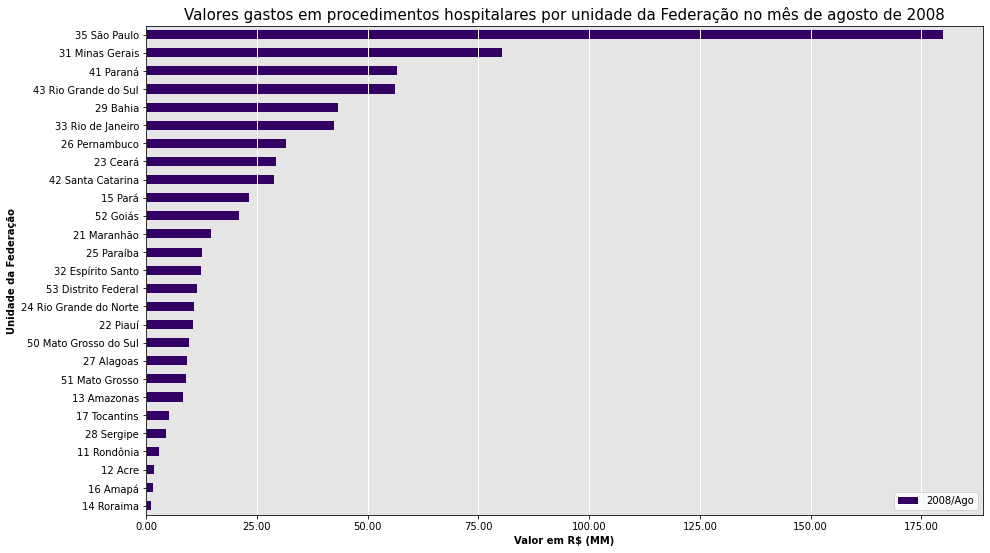

In [ ]:


#selecionando dados de agosto de 2008
dados_agosto_2008 = dados[['Unidade da Federação','2008/Ago']].sort_values(by ='2008/Ago')
dados_agosto_2008['2008/Ago'] = dados_agosto_2008['2008/Ago']/1000000

ax = dados_agosto_2008.plot(x='Unidade da Federação', y='2008/Ago', kind='barh', figsize=(15,9), color = '#330066')

ax.xaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.2f}'))

#adicionando as grids intermediarias
#ax.minorticks_on()
#ax.xaxis.grid(which='minor', linestyle ='--', linewidth=1, color = 'w')
ax.xaxis.grid(which='major', linestyle ='-', linewidth=1, color = 'w')

#adicionado legendas
ax.set_xlabel('Valor em R$ (MM)',color='black', fontweight='bold')
ax.set_ylabel('Unidade da Federação',color='black', fontweight='bold')

#adicionando cores nos eixos
ax.tick_params(axis='x', colors='black')
ax.tick_params(axis='y', colors='black')
#adicionando cor no fundo
ax.set_facecolor("#e6e5e5")

plt.title('Valores gastos em procedimentos hospitalares por unidade da Federação no mês de agosto de 2008', {'fontsize': 15, 'color': 'black'})
plt.show()

#### <font color = #1f004d> **Desafio 02: Realizar a mesma análise da aula para o mês atual.** 

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


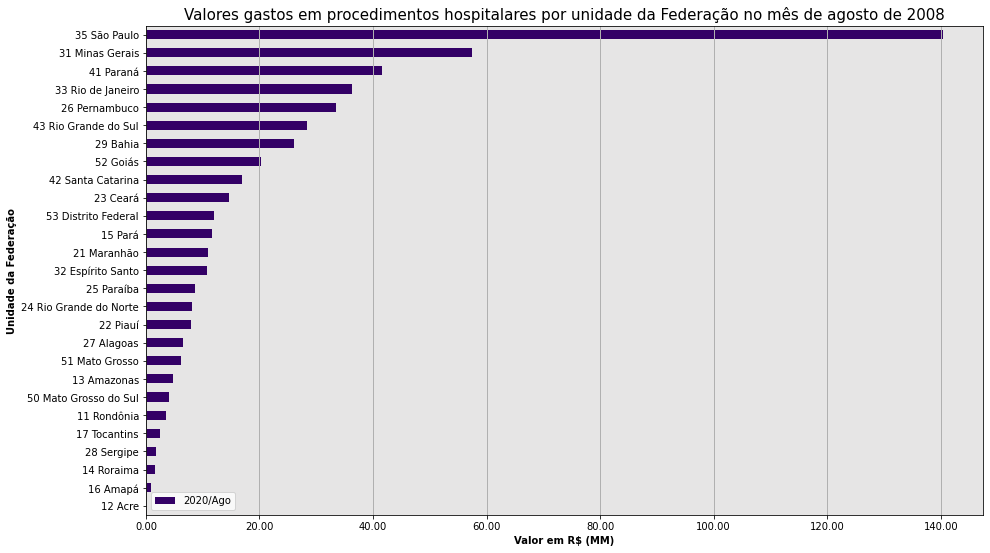

In [ ]:

dados_mes_atual = dados[['Unidade da Federação', '2020/Ago']]
dados_mes_atual['2020/Ago'] = dados_mes_atual['2020/Ago'].str.replace('-','0').fillna(0).astype(float)

dados_mes_atual = dados_mes_atual.sort_values(by ='2020/Ago')
dados_mes_atual['2020/Ago'] = dados_mes_atual['2020/Ago']/1000000

ax = dados_mes_atual.plot(x='Unidade da Federação', y='2020/Ago', kind='barh', figsize=(15,9), color = '#330066')

ax.xaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.2f}'))

#adicionando as grids intermediarias
#ax.minorticks_on()
#ax.xaxis.grid(which='minor', linestyle ='--', linewidth=1)
ax.xaxis.grid(which='major', linestyle ='-', linewidth=1)

ax.set_xlabel('Valor em R$ (MM)',color='black', fontweight='bold')
ax.set_ylabel('Unidade da Federação',color='black', fontweight='bold')


ax.tick_params(axis='x', colors='black')
ax.tick_params(axis='y', colors='black')
ax.set_facecolor("#e6e5e5")

plt.title('Valores gastos em procedimentos hospitalares por unidade da Federação no mês de agosto de 2008', {'fontsize': 15, 'color': 'black'})
plt.show()

---
##<font color = #944dff>  **Aula 2**
---

#### <font color = #8533ff> **2.1 - Novo Tratamento**

In [ ]:
#fazendo um slicing do dataframe
dados[['2008/Ago', '2008/Set']].head()

2008/Ago    2008/Set
0  2938286.29  2843930.91
1  1886871.84  2084884.80
2  8331763.97  8148089.92
3  1045291.11  1003740.89
4 23259148.28 23667690.01

In [ ]:
#aqui fazemos uma amostra das colunas que não possuem dados faltantes.
#tive que retornar ao carregamento dos dados e tirar o na_values = '-', já que ele influencia nessa análise.

#fica de desafio verificar uma forma de validar se não há nenhum valor vazio trazendo na_values = '-'
dados.mean().index

Index(['2007/Ago', '2007/Set', '2007/Out', '2007/Nov', '2007/Dez', '2008/Jan',
       '2008/Fev', '2008/Mar', '2008/Abr', '2008/Mai',
       ...
       '2019/Nov', '2019/Dez', '2020/Jan', '2020/Fev', '2020/Mar', '2020/Abr',
       '2020/Mai', '2020/Jun', '2020/Jul', 'Total'],
      dtype='object', length=157)

In [ ]:
#aqui conseguiremos pegar todos os index que possuem todos os números
#o index é imutável, logo transormamos ele em lista para adicionar mais
#um campo.

colunas_usaveis = dados.mean().index.to_list()
#ao executar esse comando, perdenos o unidade da federação

colunas_usaveis.insert(0, 'Unidade da Federação') 
usaveis = dados[colunas_usaveis]
usaveis.head()

Unidade da Federação  2007/Ago  ...    2020/Jul         Total
0          11 Rondônia   4209.37  ...  7407388.24  929129659.72
1              12 Acre  10470.07  ...  1163813.08  420668039.63
2          13 Amazonas  35752.72  ... 13358514.02 1771654871.23
3           14 Roraima   4785.91  ...  2739498.41  305010883.18
4              15 Pará 181159.29  ... 27618727.51 4437115730.71

[5 rows x 158 columns]

In [ ]:
#alterando o index para a Unidade da Federação
usaveis = usaveis.set_index('Unidade da Federação')
usaveis.head(1)

2007/Ago  2007/Set  ...   2020/Jul        Total
Unidade da Federação                      ...                        
11 Rondônia            4209.37  16397.03  ... 7407388.24 929129659.72

[1 rows x 157 columns]

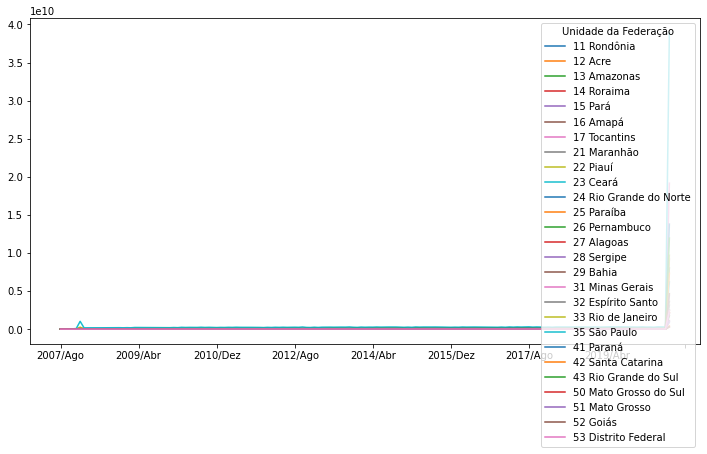

In [ ]:
'''
 ao tentar plotar algum gráfico pelos estados, o matplot entende que os estados eram o eixo X
 isso devido ao formato do dataframe, logo usamos o transpor para mudar o eixo de colunas por 
 linhas
'''
usaveis.T.plot(figsize=(12,6))

In [ ]:
'''
vemos que ao plotar assim, esquecemos de analisar a última informação que era a coluna Total.
é 
'''
usaveis.drop('Total', axis=1, inplace=True)

### <font color = #1f004d> **Desafios**

#### <font color = #1f004d> **Desafio 01: Reposicionar a legenda do gráfico em uma posição mais adequada**

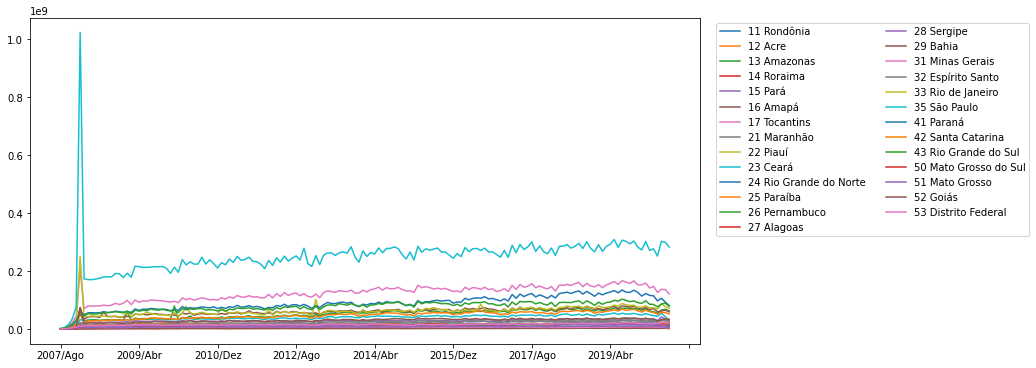

In [ ]:
usaveis.T.plot(figsize=(12,6))
plt.legend(bbox_to_anchor=(1.5,1), frameon=True, ncol=2, fancybox=True)
plt.show()

#### <font color = #1f004d> **Desafio 02: Plotar o gráfico de linha com apenas 5 estados de sua preferência**

In [ ]:
'''
Como não tenho preferência, nem quero me enviezar pela minha região de natureza, irei randomizar a escolha
'''
# chamando o random seed para sempre termos a mesma amostragem
np.random.seed(42)
#executo o método sample com 5 colunas,
cinco_estados =  usaveis.T.sample(n=5, axis='columns')
cinco_estados.head(1)

Unidade da Federação  22 Piauí  27 Alagoas  ...  42 Santa Catarina  11 Rondônia
2007/Ago             220788.25   104243.75  ...          693955.05      4209.37

[1 rows x 5 columns]

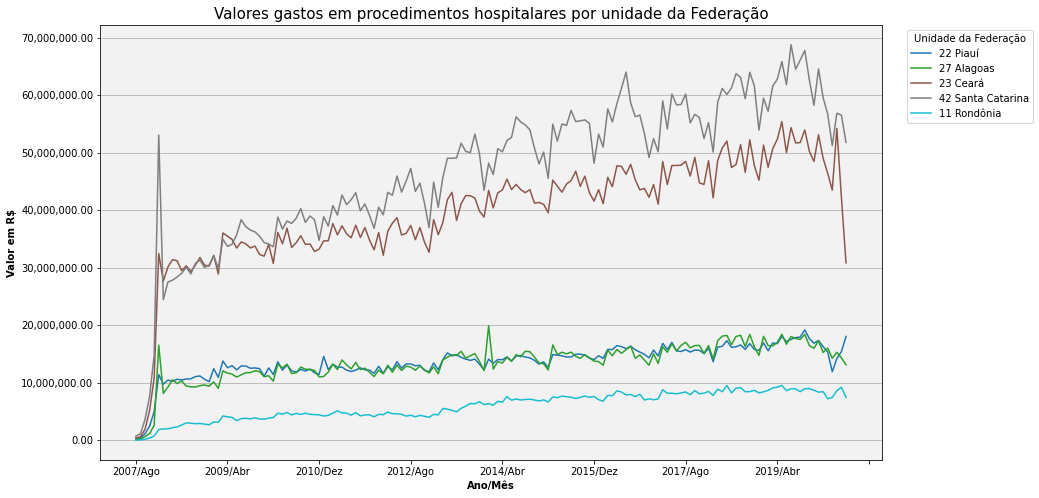

In [ ]:
ax = cinco_estados.plot(figsize=(14,8), colormap='tab10')


ax.yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.2f}'))



ax.set_xlabel('Ano/Mês',color='black', fontweight='bold')
ax.set_ylabel('Valor em R$',color='black', fontweight='bold')


ax.tick_params(axis='x', colors='black')
ax.tick_params(axis='y', colors='black')
ax.set_facecolor("#f2f2f2")


plt.legend(bbox_to_anchor=(1.2,1), frameon=True, ncol=1, fancybox=True, title='Unidade da Federação')
plt.title('Valores gastos em procedimentos hospitalares por unidade da Federação', {'fontsize': 15, 'color': 'black'})
plt.grid(axis = 'y')
plt.show()

---
##<font color = #944dff>  **Aula 3**
---

#### <font color = #8533ff> **3.1 - Aleatoriedade e mais explorações**

In [ ]:
usaveis.T.columns


Index(['11 Rondônia', '12 Acre', '13 Amazonas', '14 Roraima', '15 Pará',
       '16 Amapá', '17 Tocantins', '21 Maranhão', '22 Piauí', '23 Ceará',
       '24 Rio Grande do Norte', '25 Paraíba', '26 Pernambuco', '27 Alagoas',
       '28 Sergipe', '29 Bahia', '31 Minas Gerais', '32 Espírito Santo',
       '33 Rio de Janeiro', '35 São Paulo', '41 Paraná', '42 Santa Catarina',
       '43 Rio Grande do Sul', '50 Mato Grosso do Sul', '51 Mato Grosso',
       '52 Goiás', '53 Distrito Federal'],
      dtype='object', name='Unidade da Federação')

In [ ]:
# este Index do pandas, possui o formato de acesso igual a um array do numpy ou de uma lista, assim executamos o slicing dos 5 primeiros
usaveis.T.columns[:5]

Index(['11 Rondônia', '12 Acre', '13 Amazonas', '14 Roraima', '15 Pará'], dtype='object', name='Unidade da Federação')

In [ ]:
# sem usar o Transpose, podemos acessar pelos index
usaveis.index[:5]

Index(['11 Rondônia', '12 Acre', '13 Amazonas', '14 Roraima', '15 Pará'], dtype='object', name='Unidade da Federação')

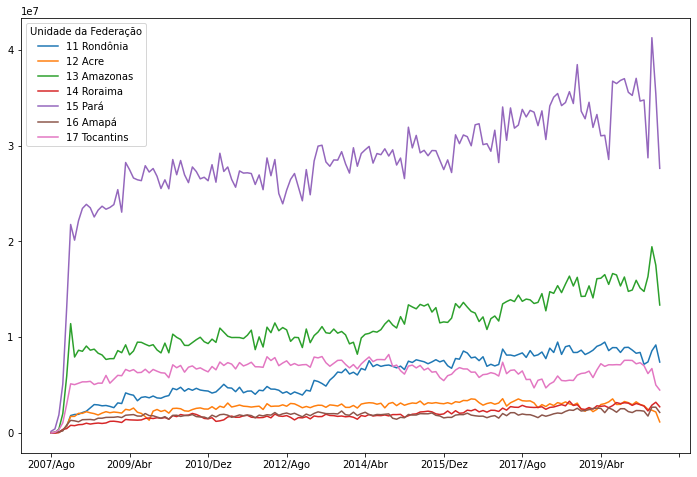

In [ ]:
usaveis[:7].T.plot(figsize=(12,8))

#### <font color = #8533ff> **3.2 - Ordenação e série temporal**

In [ ]:
#recriando a coluna total, com o ensinamento como se adiciona coluna num dataframe.
usaveis['Total'] = usaveis.sum(axis=1)
usaveis.head(2)

2007/Ago  2007/Set  ...   2020/Jul        Total
Unidade da Federação                      ...                        
11 Rondônia            4209.37  16397.03  ... 7407388.24 925572673.82
12 Acre               10470.07  14001.71  ... 1163813.08 420666755.81

[2 rows x 157 columns]

In [ ]:
# Ao executar o sort_values ele vem por padrão como ordenamento crescente.
ordenado_por_total = usaveis.sort_values(by = 'Total', ascending=False)
ordenado_por_total = ordenado_por_total.drop('Total', axis = 1)
ordenado_por_total.head()

2007/Ago   2007/Set  ...     2020/Jun     2020/Jul
Unidade da Federação                        ...                          
35 São Paulo         1665349.90 4434168.64  ... 299060851.62 282709570.31
31 Minas Gerais       971394.37 2861781.50  ... 135977571.87 120467187.34
41 Paraná             554800.22 1431708.01  ...  92901461.36  80320852.69
43 Rio Grande do Sul 1049252.33 3182913.14  ...  89019478.82  78929703.81
33 Rio de Janeiro     469469.34  921646.57  ...  77604925.21  71540227.33

[5 rows x 156 columns]

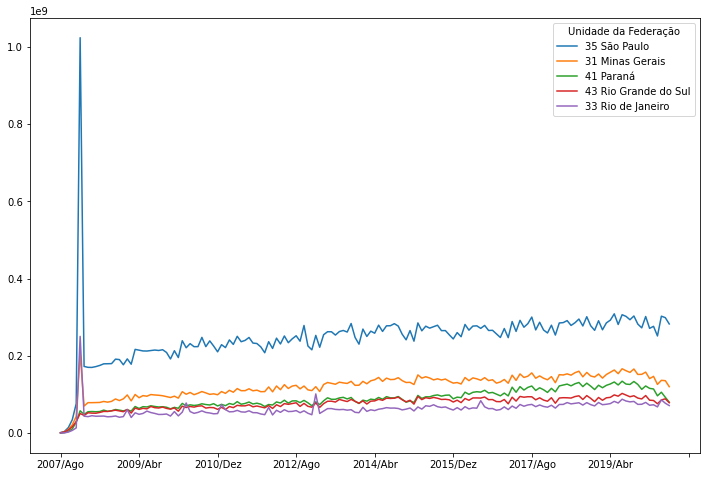

In [ ]:
ordenado_por_total[:5].T.plot(figsize=(12,8))

In [ ]:
'''
Para fazer o slicing mais simplificado, podemos usar o iloc, que irá buscar pelo index.

Nele, primeiro executamos o slicing das linhas e depois das colunas.


# Na aula foi executado da forma abaixo:
colunas_interessadas = ordenado_por_total.columns[6:] # Aqui criamos uma seleção das colunas pelo index de inicio
ordenado_por_total[colunas_interessadas].head() #aqui aplicamos a selecao no ordenado por total.

'''
ordenado_por_total = ordenado_por_total.iloc[:, 6:]


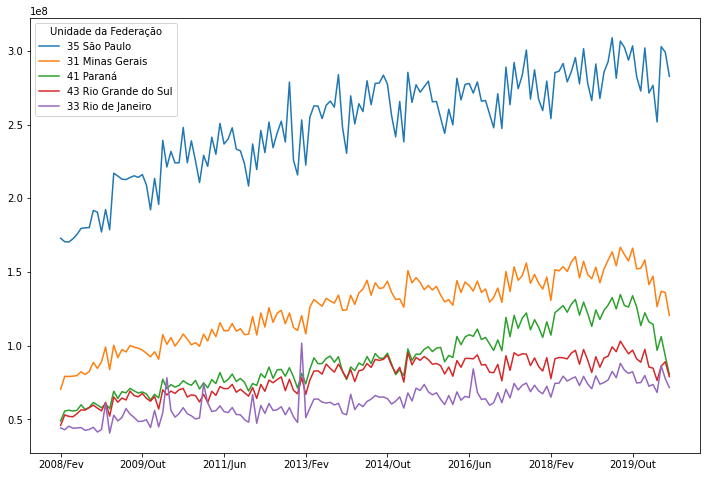

In [ ]:
ordenado_por_total[:5].T.plot(figsize=(12,8))

### <font color = #1f004d> **Desafios**

#### <font color = #1f004d> **Desafio 01: Escolher uma palete de cores mais adequada do matplotlib.**

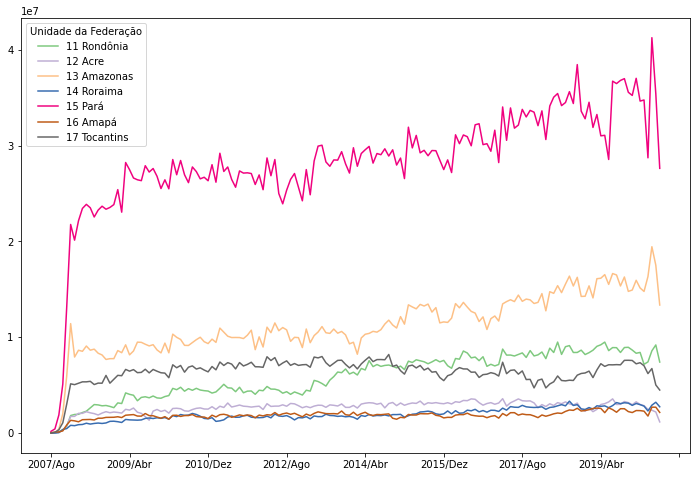

In [ ]:
'''
A ideia é executar os desafios conforme ordem das aulas, porém estou executando após terminar cada aula, a fim de 
não perder a linha de raciocínio, então usarei os mesmos dados como se fosse na hora.

Apenas adicionada a nova paleta de cores, tive que executar um slicing nos dados, já que incluimos o valor total no dataset.
'''

usaveis.iloc[:7, :-1].T.plot(figsize=(12,8), colormap='Accent')
plt.show()

#### <font color = #1f004d> **Desafio 02: Adicionar uma coluna mostrando a região (Norte, Nodeste, Sul, Suldeste e Centro-Oeste) de cada estado.**

In [ ]:
'''
Já entendi que eles estão utilizando a codificação do IBGE para a numeração dos estados

Mas a priori não farei inclusão de nova base, apenas criarei um dicionário que represente

Código	Nível	Unidade
1	Brasil	Brasil
1	Grande Região	Norte
2	Grande Região	Nordeste
3	Grande Região	Sudeste
4	Grande Região	Sul
5	Grande Região	Centro-Oeste
'''

regiao = {'1' : 'Norte',
          '2' : 'Nordeste',
          '3' : 'Sudeste',
          '4' : 'Sul',
          '5' : 'Centro-Oeste'
}

'''
Como executarei, criei uma coluna chamada região onde passarei o primeiro número da 
Unidade da Federação que é o indicador da Região.

Para isso, usamos o index.str.get que retorna a string na posição desejada.

Transformo em uma lista para podermos incluir no dataframe
'''
usaveis['Região'] = usaveis.index.str.get(0).to_list()

# Fazendo agora o mapeamento do dicionário na coluna Região
usaveis['Região'] = usaveis['Região'].map(regiao)
usaveis.head(3)

2007/Ago  2007/Set  ...         Total  Região
Unidade da Federação                      ...                      
11 Rondônia            4209.37  16397.03  ...  925572673.82   Norte
12 Acre               10470.07  14001.71  ...  420666755.81   Norte
13 Amazonas           35752.72  45570.64  ... 1766925554.09   Norte

[3 rows x 158 columns]

In [ ]:
usaveis.tail(3)

2007/Ago  2007/Set  ...         Total        Região
Unidade da Federação                      ...                            
51 Mato Grosso        63562.50 232444.62  ... 2030739826.14  Centro-Oeste
52 Goiás             179395.82 418053.58  ... 4637039055.60  Centro-Oeste
53 Distrito Federal  191951.47 769966.25  ... 2417774340.23  Centro-Oeste

[3 rows x 158 columns]

#### <font color = #1f004d> **Desafio 03: Formatar o gráfico de custos por mês dos 5 estados, deixando ele agradável (Bonitão, segundo o Gui)**

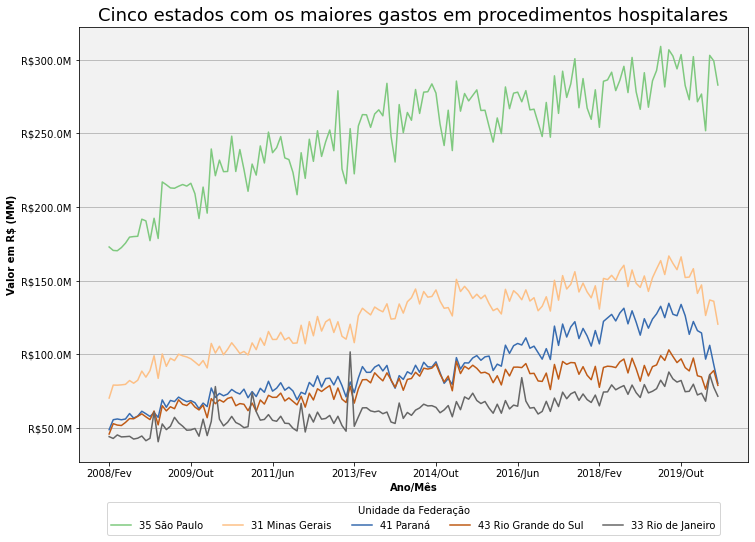

In [ ]:
ax = ordenado_por_total[:5].T.plot(figsize=(12,8), colormap='Accent')
def milhoes(x, pos):
    'Os argumentos são o valor e a posição'
    return f'R${(x/1000000)}M'

ax.yaxis.set_major_formatter(ticker.FuncFormatter(milhoes))


ax.set_xlabel('Ano/Mês',color='black', fontweight='bold')
ax.set_ylabel('Valor em R$ (MM)',color='black', fontweight='bold')


ax.tick_params(axis='x', colors='black')
ax.tick_params(axis='y', colors='black')
ax.set_facecolor("#f2f2f2")

#bbox_to_anchor=(1.25,1)
plt.legend(bbox_to_anchor=(0.5,-0.18), loc = 'lower center',frameon=True, ncol=5, fancybox=True, title='Unidade da Federação')
plt.title('Cinco estados com os maiores gastos em procedimentos hospitalares', {'fontsize': 18, 'color': 'black'})
plt.grid(axis = 'y')
plt.show()

#### <font color = #1f004d>  **Desafio 04: Adicione o seu estado aos 5 estados plotados anteriormente**

In [ ]:
'''
Como meu estado já faz parte dos 5 primeiros, escolherei um aleatório
E irei criar uma variável para guardar os 5 primeiros e adicionar o 6 estado.
'''

np.random.seed(42)
#executo o método sample com 1 linha
novo_estado = ordenado_por_total[5:].sample(n=1, axis='rows')
estados_plotados = ordenado_por_total[:5]
estados_plotados = estados_plotados.append(novo_estado)

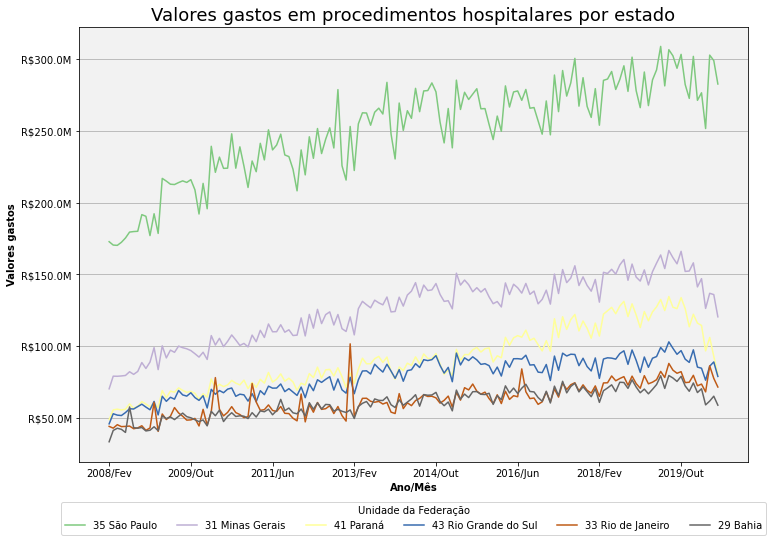

In [ ]:
ax = estados_plotados.T.plot(figsize=(12,8), colormap='Accent')



ax.yaxis.set_major_formatter(ticker.FuncFormatter(milhoes))


ax.set_xlabel('Ano/Mês',color='black', fontweight='bold')
ax.set_ylabel('Valores gastos',color='black', fontweight='bold')


ax.tick_params(axis='x', colors='black')
ax.tick_params(axis='y', colors='black')
ax.set_facecolor("#f2f2f2")

#bbox_to_anchor=(1.25,1)
plt.legend(bbox_to_anchor=(0.5,-0.18), loc = 'lower center',frameon=True, ncol=6, fancybox=True, title='Unidade da Federação')
plt.title('Valores gastos em procedimentos hospitalares por estado', {'fontsize': 18, 'color': 'black'})
plt.grid(axis = 'y')
plt.show()

O interessante é que a aleatoriedade trouxe um dos estados que gasta quase exatamente a mesma quantidade que o estado do Rio de Janeiro, podemos futuramente olhar outros parâmetros e verificar se há alguma similariade no IDH ou quantiade de população.

#### <font color = #1f004d> **Desafio 05: Buscar os casos de dengue no Brasil (época de maior número de casos e regiões mais atingidas) e se os picos de alguns estados em fevereiro e verão de modo geral, pode ser reflexos dos casos de dengue**

W.I.P

#### <font color = #1f004d> **Desafio 06: Plotar o gráfico dos custos apenas dos estados da região sudeste e verificar se os picos de 2013/Fev teve comportamento similar em todos os demais estados da região**

In [ ]:
'''
O Proposto é plotar somente o sudeste, então irei selecionar via coluna criada, porém deveremos 
acessar novamente nossos dados usaveis e fazer um novo corte
'''

estados_sudeste = usaveis.query('Região == "Sudeste"') # Fiz uma query apenas no Sudeste
estados_sudeste = estados_sudeste.iloc[:, 6:-2] # Retirei a coluna total e coluna da região e as as datas antes de fevereiro de 2008
estados_sudeste

2008/Fev     2008/Mar  ...     2020/Jun     2020/Jul
Unidade da Federação                            ...                          
31 Minas Gerais       70301089.50  79119005.51  ... 135977571.87 120467187.34
32 Espírito Santo     10032886.43  12262049.08  ...  27450865.16  27460475.47
33 Rio de Janeiro     44122593.19  42892665.52  ...  77604925.21  71540227.33
35 São Paulo         172834914.73 170481849.56  ... 299060851.62 282709570.31

[4 rows x 150 columns]

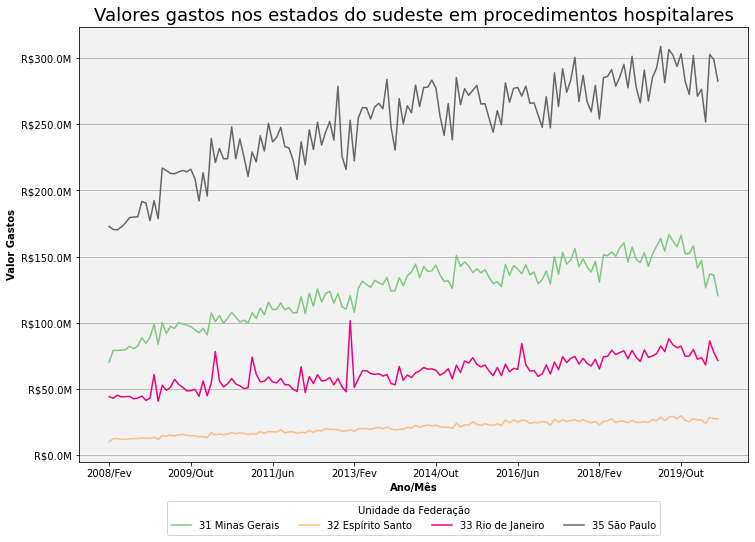

In [ ]:
ax = estados_sudeste.T.plot(figsize=(12,8), colormap='Accent')


ax.yaxis.set_major_formatter(ticker.FuncFormatter(milhoes))


ax.set_xlabel('Ano/Mês',color='black', fontweight='bold')
ax.set_ylabel('Valor Gastos',color='black', fontweight='bold')


ax.tick_params(axis='x', colors='black')
ax.tick_params(axis='y', colors='black')
ax.set_facecolor("#f2f2f2")

#bbox_to_anchor=(1.25,1)
plt.legend(bbox_to_anchor=(0.5,-0.18), loc = 'lower center',frameon=True, ncol=6, fancybox=True, title='Unidade da Federação')
plt.grid(axis = 'y')
plt.title('Valores gastos nos estados do sudeste em procedimentos hospitalares', {'fontsize': 18, 'color': 'black'})
plt.show()

Podemos notar que somente o Rio teve o pico atípico, São Paulo teve um pico em um mês anterior ao que parece, porém os dados de São Paulo são muito sasonais.

#### <font color = #1f004d>  **Desafio 07: Adicionar seu estado escolhido novamente, deixe o gráfico informativo e tire conclusões sobre seus estados comparando com os demais. Tire suas conclusões e compartilhe com a gente.**

In [ ]:
estados_sudeste_mais_novo = estados_sudeste.append(novo_estado)

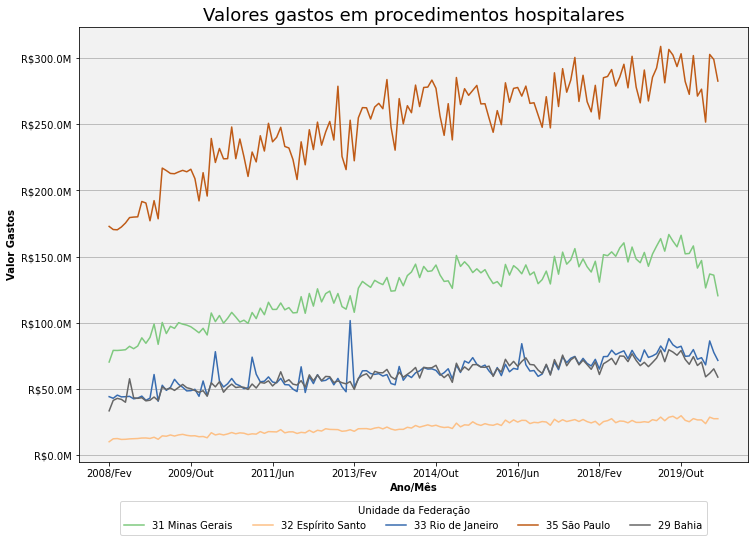

In [ ]:
ax = estados_sudeste_mais_novo.T.plot(figsize=(12,8), colormap='Accent')

ax.yaxis.set_major_formatter(ticker.FuncFormatter(milhoes))


ax.set_xlabel('Ano/Mês',color='black', fontweight='bold')
ax.set_ylabel('Valor Gastos',color='black', fontweight='bold')


ax.tick_params(axis='x', colors='black')
ax.tick_params(axis='y', colors='black')
ax.set_facecolor("#f2f2f2")

#bbox_to_anchor=(1.25,1)
plt.legend(bbox_to_anchor=(0.5,-0.18), loc = 'lower center',frameon=True, ncol=6, fancybox=True, title='Unidade da Federação')
plt.title('Valores gastos em procedimentos hospitalares', {'fontsize': 18, 'color': 'black'})
plt.grid(axis = 'y')
plt.show()

Assim como anteriormente, o estado da Bahia tem os valores muito próximos ao do Rio de Janeiro. O que nos leva a uma investigação mais apurada.

---
##<font color = #944dff>  **Aula 4**
---

#### <font color = #8533ff> **4.1 - Fugindo das más práticas**

In [ ]:
mes_mais_recente = ordenado_por_total.columns[-1]
mes_mais_recente

'2020/Jul'

In [ ]:
gastos_do_mais_recente =  ordenado_por_total[mes_mais_recente]
gastos_do_mais_recente.head()

Unidade da Federação
35 São Paulo           282709570.31
31 Minas Gerais        120467187.34
41 Paraná               80320852.69
43 Rio Grande do Sul    78929703.81
33 Rio de Janeiro       71540227.33
Name: 2020/Jul, dtype: float64

In [ ]:
gasto_do_mais_recente_comparado_rj = gastos_do_mais_recente / gastos_do_mais_recente.loc['33 Rio de Janeiro']
gasto_do_mais_recente_comparado_rj

Unidade da Federação
35 São Paulo             3.95
31 Minas Gerais          1.68
41 Paraná                1.12
43 Rio Grande do Sul     1.10
33 Rio de Janeiro        1.00
29 Bahia                 0.82
26 Pernambuco            0.87
42 Santa Catarina        0.72
23 Ceará                 0.43
52 Goiás                 0.47
15 Pará                  0.39
21 Maranhão              0.34
32 Espírito Santo        0.38
24 Rio Grande do Norte   0.27
25 Paraíba               0.22
53 Distrito Federal      0.31
50 Mato Grosso do Sul    0.17
22 Piauí                 0.25
27 Alagoas               0.18
51 Mato Grosso           0.18
13 Amazonas              0.19
28 Sergipe               0.05
17 Tocantins             0.06
11 Rondônia              0.10
12 Acre                  0.02
14 Roraima               0.04
16 Amapá                 0.03
Name: 2020/Jul, dtype: float64

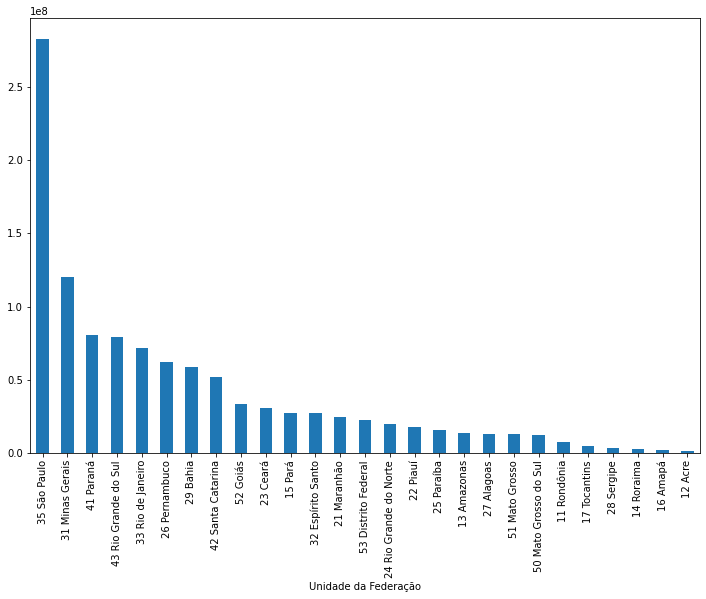

In [ ]:
gastos_do_mais_recente =  gastos_do_mais_recente.sort_values(ascending=False)
gastos_do_mais_recente.plot(kind='bar', figsize = (12,8))
plt.show()

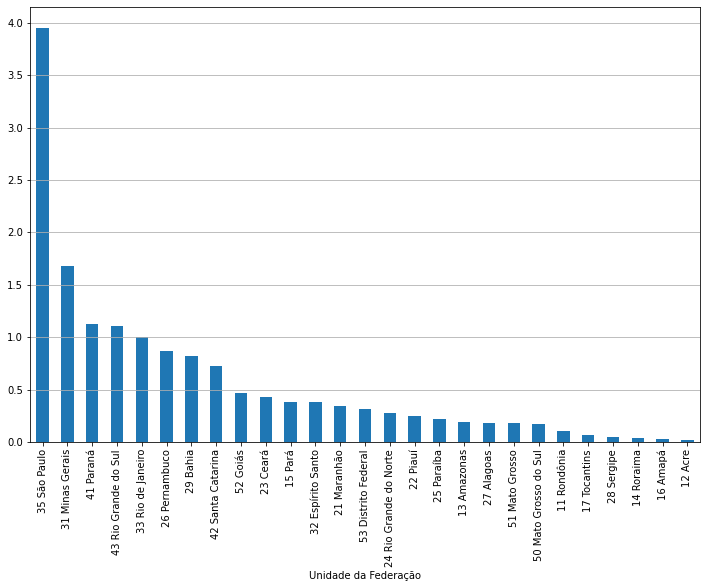

In [ ]:
gasto_do_mais_recente_comparado_rj = gasto_do_mais_recente_comparado_rj.sort_values(ascending=False)
gasto_do_mais_recente_comparado_rj.plot(kind='bar', figsize = (12,8))
plt.grid(axis ='y', which='both' )
plt.show()

### <font color = #1f004d> **Desafios**

#### <font color = #1f004d> **Desafio 01: Buscar na documentação do Matplotlib como colocar um grid nos gráficos e adicionar nos gráficos de barra.**

Existem dois métodos de inserir grids nos gráficos do Matplotlib:



*   pyplot.grid: https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.grid.html
*   axes.Axes.grid: https://matplotlib.org/3.3.2/api/_as_gen/matplotlib.axes.Axes.grid.html



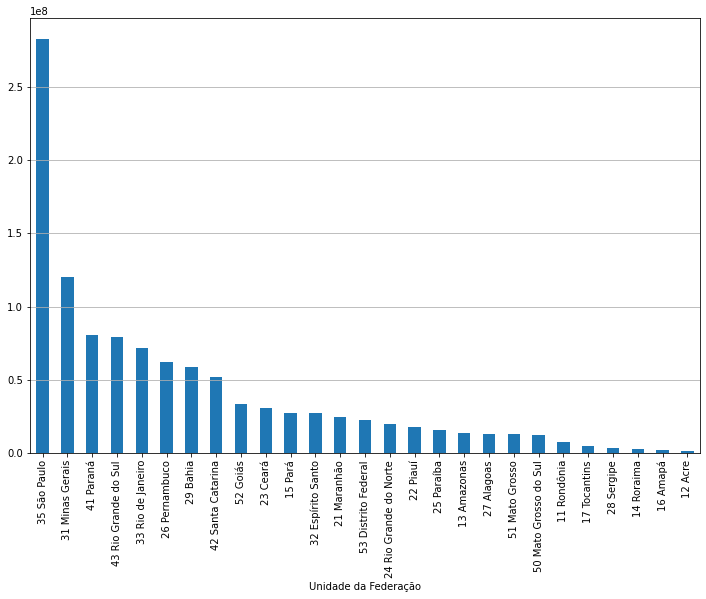

In [ ]:
gastos_do_mais_recente =  gastos_do_mais_recente.sort_values(ascending=False)
gastos_do_mais_recente.plot(kind='bar', figsize = (12,8))
plt.grid(axis ='y', which='both' )
plt.show()

#### <font color = #1f004d> **Desafio 02: Fazer um gráfico e uma tabela do gasto dos outros estados em função do seu estado, ou qualquer outro de interesse.**

In [ ]:
#Tabela

gasto_do_mais_recente_comparado_rj

Unidade da Federação
35 São Paulo             3.95
31 Minas Gerais          1.68
41 Paraná                1.12
43 Rio Grande do Sul     1.10
33 Rio de Janeiro        1.00
26 Pernambuco            0.87
29 Bahia                 0.82
42 Santa Catarina        0.72
52 Goiás                 0.47
23 Ceará                 0.43
15 Pará                  0.39
32 Espírito Santo        0.38
21 Maranhão              0.34
53 Distrito Federal      0.31
24 Rio Grande do Norte   0.27
22 Piauí                 0.25
25 Paraíba               0.22
13 Amazonas              0.19
27 Alagoas               0.18
51 Mato Grosso           0.18
50 Mato Grosso do Sul    0.17
11 Rondônia              0.10
17 Tocantins             0.06
28 Sergipe               0.05
14 Roraima               0.04
16 Amapá                 0.03
12 Acre                  0.02
Name: 2020/Jul, dtype: float64

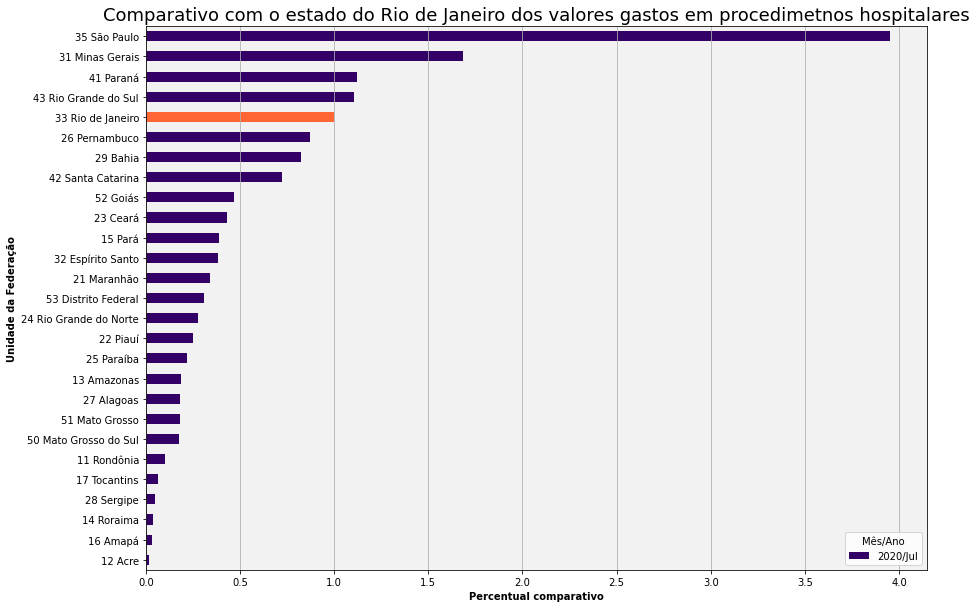

In [ ]:
gasto_do_mais_recente_comparado_rj = gasto_do_mais_recente_comparado_rj.sort_values(ascending=True)

cores = ['#330066'if indice != '33 Rio de Janeiro' else  '#ff6633' for  indice, valor in zip(gasto_do_mais_recente_comparado_rj.index,gasto_do_mais_recente_comparado_rj) ]
ax = gasto_do_mais_recente_comparado_rj.plot(kind='barh', figsize = (14,10), color = cores)


ax.set_xlabel('Percentual comparativo',color='black', fontweight='bold')
ax.set_ylabel('Unidade da Federação',color='black', fontweight='bold')


ax.tick_params(axis='x', colors='black')
ax.tick_params(axis='y', colors='black')
ax.set_facecolor("#f2f2f2")

plt.legend( loc = 'lower right',frameon=True, ncol=6, fancybox=True, title='Mês/Ano')
plt.title('Comparativo com o estado do Rio de Janeiro dos valores gastos em procedimetnos hospitalares', {'fontsize': 18, 'color': 'black'})
plt.grid(axis = 'x')
plt.show()

#### <font color = #1f004d> **Desafio 03: Fazer o cálculo proporcional a população do seu estado e mais um a sua escolha.**

Carreguei os dados de população e fiz os tratamentos dos dados exportados diretamente no pandas

In [ ]:
dados_populacao = pd.read_csv(arquivo_estudo_1, skiprows=3, sep=';',
                              skipfooter =88, engine='python',
                              thousands='.', decimal =',')

In [ ]:
dados_populacao = dados_populacao.set_index('Cód.')
dados_populacao.head()

Brasil, Grande Região e UF       2019       2020
Cód.                                                 
1                        Brasil  210147125  211755692
1                         Norte   18430980   18672591
11                     Rondônia    1777225    1796460
12                         Acre     881935     894470
13                     Amazonas    4144597    4207714

Como temos os estados abertos e na base da aula podemos pegar os códigos dos estados via string, irei criar uma coluna para separar o código e buscar o que queremos.


Eu irei fazer um comparativo dos gastos de 2019 com a população estimada de 2019, já que os gastos de 2020 ainda estão muito baixos se comparados aos outro anos.

In [ ]:
#selecionando apenas as que possuem 2019
ordenado_por_total_2019 = ordenado_por_total.loc[:, ordenado_por_total.columns.str.startswith('2019')] 
#Criando um dataframe com o somatório dos gastos em 2019
ordenado_por_total_2019 = pd.DataFrame(ordenado_por_total_2019.sum(axis=1), index=ordenado_por_total_2019.sum(axis=1).index, columns={'Valor Total 2019'})
#Criado o campo de código no dataframe
ordenado_por_total_2019['Cód.'] = ordenado_por_total_2019.index.str.slice(0,2).astype(int)
#Crio a coluna com código do IBGE de cada Unidade da Federação e irei executar o merge com essa coluna
#Já realizando algumas mudanças
valores_totais_2019 = pd.merge(ordenado_por_total_2019, dados_populacao, how='inner',on='Cód.').rename(columns = {'Cód.': 'Código IBGE', '2019' : 'População Estimada 2019', 'Brasil, Grande Região e UF': 'Estado'}).set_index('Estado').drop('2020', axis=1)

In [ ]:
valores_totais_2019['Valor Por Habitante 2019'] = valores_totais_2019['Valor Total 2019'] / valores_totais_2019['População Estimada 2019']
valores_totais_2019.head()

Valor Total 2019  ...  Valor Por Habitante 2019
Estado                                   ...                          
    São Paulo             3488394774.56  ...                     75.97
    Minas Gerais          1879921242.64  ...                     88.81
    Paraná                1512234731.07  ...                    132.26
    Rio Grande do Sul     1129688622.89  ...                     99.29
    Rio de Janeiro         949687988.75  ...                     55.01

[5 rows x 4 columns]

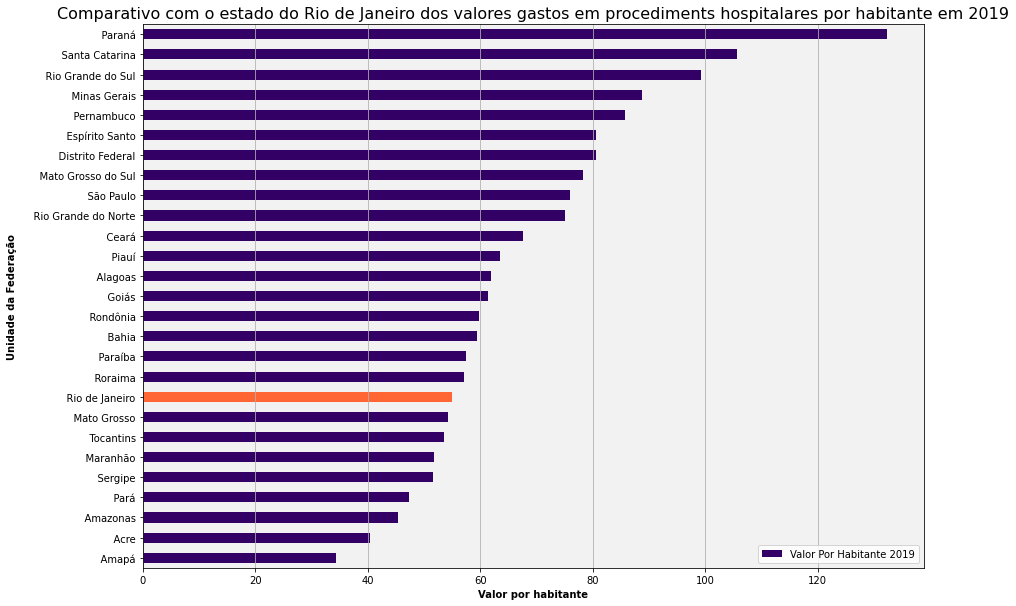

In [ ]:
valores_totais_2019 = valores_totais_2019.sort_values(by= 'Valor Por Habitante 2019', ascending=True)

cores = ['#330066'if indice != '    Rio de Janeiro' else  '#ff6633' for  indice, valor in zip(valores_totais_2019.index,valores_totais_2019['Valor Por Habitante 2019']) ]
ax = valores_totais_2019['Valor Por Habitante 2019'].plot(kind='barh', figsize = (14,10), color = cores)


ax.set_xlabel('Valor por habitante',color='black', fontweight='bold')
ax.set_ylabel('Unidade da Federação',color='black', fontweight='bold')


ax.tick_params(axis='x', colors='black')
ax.tick_params(axis='y', colors='black')
ax.set_facecolor("#f2f2f2")

plt.legend( loc = 'lower right',frameon=True, ncol=6, fancybox=True)
plt.title('Comparativo com o estado do Rio de Janeiro dos valores gastos em procediments hospitalares por habitante em 2019', {'fontsize': 16, 'color': 'black'})
plt.grid(axis = 'x')
plt.show()

Super interessante esta verificação. Podemos lembrar que o Rio era o quinta com maior gasto em procedimentos hospitalares, porém se verificarmos apenas aquela informação pensamos que a saúde é uma maravilha.

Porém se avaliarmos o total da população em 2019 e o gasto por habitante estimado, temos que o Rio está bem longe de ser o que mais investe na saúde.

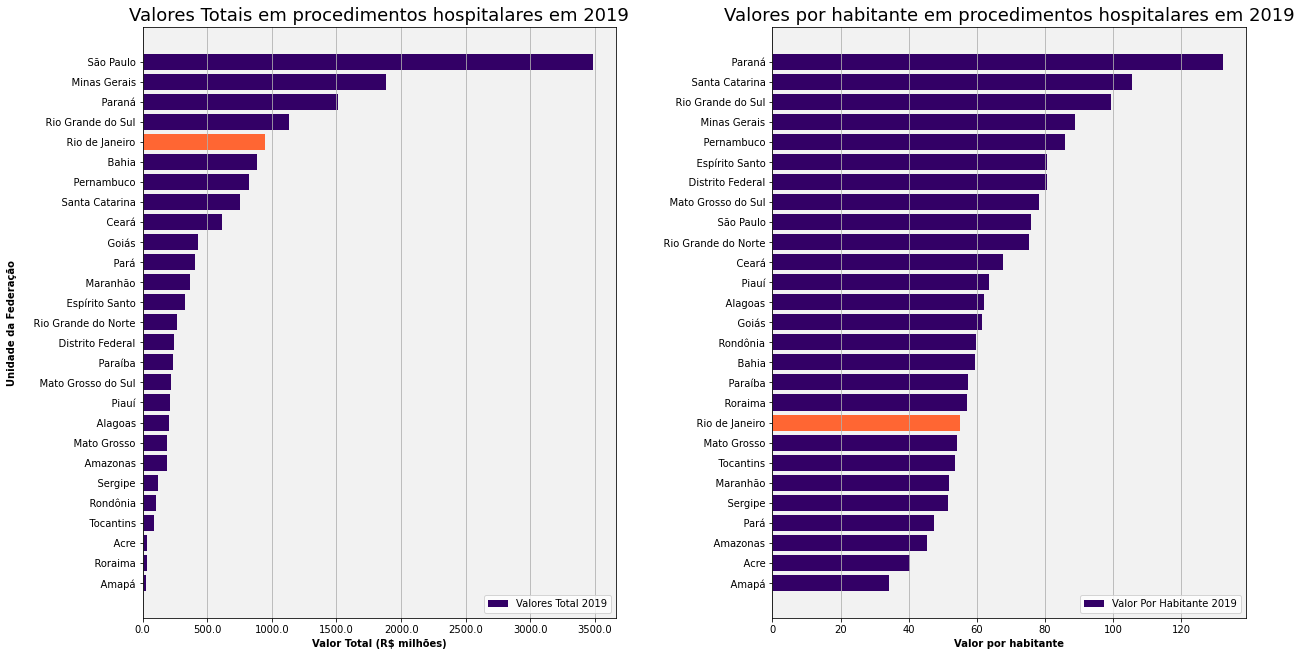

In [ ]:
#@title Código do plot
#iniciando a figura
fig, axs = plt.subplots(nrows=1,ncols=2, figsize=(18,9), constrained_layout=True)

#primeiro gráfico - Valores totais
valores_totais_2019 = valores_totais_2019.sort_values(by ='Valor Total 2019',ascending=True)

#cores para o Rio de Janeiro
cores_total = ['#330066'if indice != '    Rio de Janeiro' else  '#ff6633' for  indice, valor in zip(valores_totais_2019.index,valores_totais_2019['Valor Total 2019']) ]

#barras horizontais
axs[0].barh(valores_totais_2019.index, valores_totais_2019['Valor Total 2019'], color = cores_total, label='Valores Total 2019' )

#os labels 'x' e 'y'
axs[0].set_xlabel('Valor Total (R$ milhões)',color='black', fontweight='bold')
axs[0].set_ylabel('Unidade da Federação',color='black', fontweight='bold')

#formatação do eixo x
def milhoes_segunda_forma(x, pos):
    'Os argumentos são o valor e a posição'
    return f'{(x/1000000)}'

axs[0].xaxis.set_major_formatter(ticker.FuncFormatter(milhoes_segunda_forma))

#cor dos eixos
axs[0].tick_params(axis='x', colors='black')
axs[0].tick_params(axis='y', colors='black')
axs[0].grid(axis='x')

#cor do fundo
axs[0].set_facecolor("#f2f2f2")

#legenda
axs[0].legend(loc = 'lower right',frameon=True,  fancybox=True)
axs[0].set_title('Valores Totais em procedimentos hospitalares em 2019', {'fontsize': 18, 'color': 'black'})

#segundo gráfico - Valores por habitantes
valores_totais_2019 = valores_totais_2019.sort_values(by ='Valor Por Habitante 2019',ascending=True)

#cores para o Rio de Janeiro
cores_hab = ['#330066'if indice != '    Rio de Janeiro' else  '#ff6633' for  indice, valor in zip(valores_totais_2019.index,valores_totais_2019['Valor Por Habitante 2019']) ]

#barras horizontais
axs[1].barh(valores_totais_2019.index, valores_totais_2019['Valor Por Habitante 2019'], color = cores_hab,  label='Valor Por Habitante 2019' )

#os labels 'x' e 'y'
axs[1].set_xlabel('Valor por habitante',color='black', fontweight='bold')


#cor dos eixos
axs[1].tick_params(axis='x', colors='black')
axs[1].tick_params(axis='y', colors='black')
axs[1].grid(axis='x')

#cor do fundo
axs[1].set_facecolor("#f2f2f2")

#legenda
axs[1].legend(loc = 'lower right',frameon=True,  fancybox=True)
axs[1].set_title('Valores por habitante em procedimentos hospitalares em 2019', {'fontsize': 18, 'color': 'black'})

plt.show()

Neste caso agora com os dois gráficos lado a lado, podemos realmente perceber que apesar do Rio de Janeiro ser um dos top 5 que mais gastam com procedimentos hospitalares, eles estão muito longe de ser os que mais investem por habitante. 

Ou seja, para que houvesse um nível de saúde comparável ao do Paraná, o Rio deveria investir pelo menos o dobro do que investe atualmente.

Isso também não significa que a saúde onde se mais investe é a melhor possível, para termos estas informações devemos nos munir de mais dados, como IDH, índices de morbidade e índices de nascimento.


Outro ponto, que havíamos por aleatoriedade incluído a Bahia com os 5 maiores que investem, tendo ela sido a 6 a investir a mais no ano de 2019 também. Ela apesar de investir quase o mesmo montante do que o Rio de Janeiro, proporcionalmente à sua população ela investe mais que o Rio de Janeiro.

##### <font color = #1f004d> **Desafio 04: Faça uma análise dos dados analisados, levante hipóteses e compartilhe com a gente no Discord.**

Irei fazer o mesmo mapeamento de dados que fiz anteriormente, agora para a região. Lembrando que estou usando um slicing do nosso dataframe inicial e retirei diversas informações.

Como já sabemos criar com o map e temos o dataset do IBGE, iremos apenas fixar o aprendizado do merge.

Após esse tratamento iremos verificar quais regiões investiram mais e proporcionalmente a população foi investido.

In [ ]:
valores_totais_2019['Cód.'] = valores_totais_2019['Código IBGE'].astype(str).str.get(0).astype(int)
valores_totais_2019.reset_index(inplace=True) #para não perder a coluna de Estado, devemos resetar o index antes do merge
valores_totais_2019 = pd.merge(valores_totais_2019,dados_populacao[dados_populacao['Brasil, Grande Região e UF'] != 'Brasil'], how='left', on='Cód.')
valores_totais_2019.drop(['2019', '2020'], axis=1, inplace=True)
valores_totais_2019.rename(columns={'Brasil, Grande Região e UF' : 'Região', 'Cód': 'Código IBGE Região'}, inplace=True)
valores_totais_2019.set_index('Estado', inplace=True)
valores_totais_2019.head()

Valor Total 2019  Código IBGE  ...  Cód.      Região
Estado                                       ...                  
    Amapá          29025429.19           16  ...     1       Norte
    Acre           35575765.00           12  ...     1       Norte
    Amazonas      188226825.98           13  ...     1       Norte
    Pará          407971524.00           15  ...     1       Norte
    Sergipe       118502754.59           28  ...     2    Nordeste

[5 rows x 6 columns]

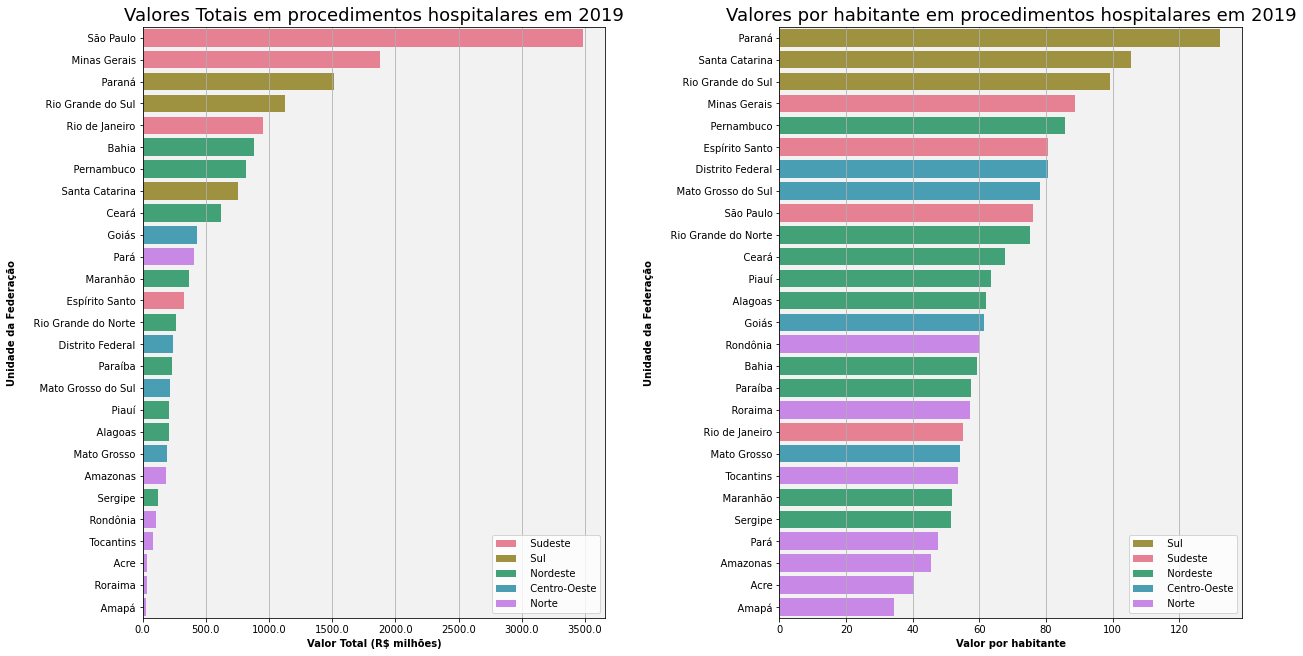

In [ ]:
#@title Código do plot

#iniciando a figura
fig, axs = plt.subplots(nrows=1,ncols=2, figsize=(18,9), constrained_layout=True)

#primeiro gráfico - Valores totais
valores_totais_2019 = valores_totais_2019.sort_values(by ='Valor Total 2019',ascending=False)

#paleta de cores
paleta = dict(zip(valores_totais_2019['Região'].unique(), sns.color_palette("husl", 5)))

#barras horizontais
sns.barplot(ax=axs[0],x='Valor Total 2019' , y=valores_totais_2019.index, data=valores_totais_2019, hue='Região', dodge=False, palette=paleta)


#os labels 'x' e 'y'
axs[0].set_xlabel('Valor Total (R$ milhões)',color='black', fontweight='bold')
axs[0].set_ylabel('Unidade da Federação',color='black', fontweight='bold')

#formatação do eixo x
def milhoes_segunda_forma(x, pos):
    'Os argumentos são o valor e a posição'
    return f'{(x/1000000)}'

axs[0].xaxis.set_major_formatter(ticker.FuncFormatter(milhoes_segunda_forma))

#cor dos eixos
axs[0].tick_params(axis='x', colors='black')
axs[0].tick_params(axis='y', colors='black')
axs[0].grid(axis='x')

#cor do fundo
axs[0].set_facecolor("#f2f2f2")

#legenda
axs[0].legend(loc = 'lower right',frameon=True,  fancybox=True)
axs[0].set_title('Valores Totais em procedimentos hospitalares em 2019', {'fontsize': 18, 'color': 'black'})

#segundo gráfico - Valores por habitantes
valores_totais_2019 = valores_totais_2019.sort_values(by ='Valor Por Habitante 2019',ascending=False)


#barras horizontais
sns.barplot(ax=axs[1],x='Valor Por Habitante 2019' , y=valores_totais_2019.index, data=valores_totais_2019, hue='Região', dodge=False, palette=paleta)


#os labels 'x' e 'y'
axs[1].set_xlabel('Valor por habitante',color='black', fontweight='bold')
axs[1].set_ylabel('Unidade da Federação',color='black', fontweight='bold')


#cor dos eixos
axs[1].tick_params(axis='x', colors='black')
axs[1].tick_params(axis='y', colors='black')
axs[1].grid(axis='x')

#cor do fundo
axs[1].set_facecolor("#f2f2f2")

#legenda
axs[1].legend(loc = 'lower right',frameon=True,  fancybox=True)
axs[1].set_title('Valores por habitante em procedimentos hospitalares em 2019', {'fontsize': 18, 'color': 'black'})

plt.show()

O Sudeste tem os estados que mais gastam em procedimentos, apesar desse número não ser refletido quando estamos comparando pela população. Tendo a região Sul a região que mais investe proporcionalmente a sua população.

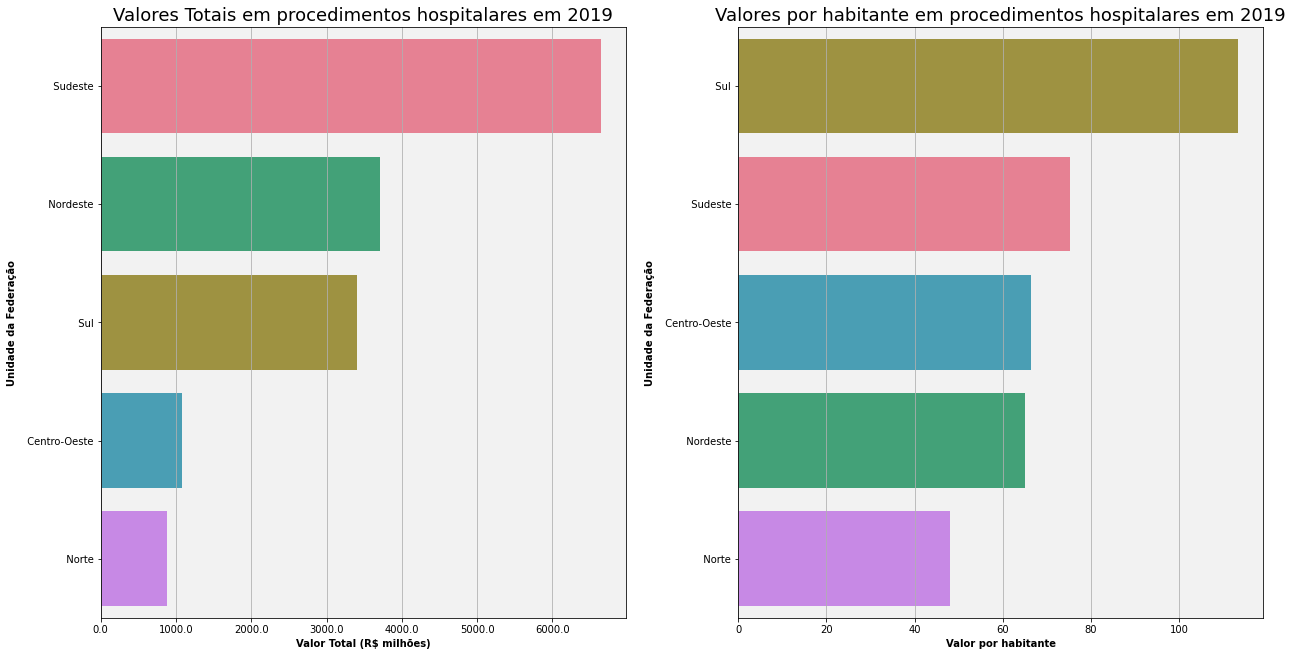

In [ ]:
#@title Código do plot
#Criando um dataframe apenas com a soma
valores_totais_2019_regiao = valores_totais_2019.groupby(by=['Região']).sum()
valores_totais_2019_regiao['Valor Por Habitante 2019'] = valores_totais_2019_regiao['Valor Total 2019'] / valores_totais_2019_regiao['População Estimada 2019']

#iniciando a figura
fig, axs = plt.subplots(nrows=1,ncols=2, figsize=(18,9), constrained_layout=True)

#primeiro gráfico - Valores totais
ordem_1 = valores_totais_2019_regiao.sort_values(by ='Valor Total 2019',ascending=False).index


#barras horizontais
sns.barplot(ax=axs[0],x='Valor Total 2019' , y=valores_totais_2019_regiao.index, data=valores_totais_2019_regiao, palette=paleta, order=ordem_1)


#os labels 'x' e 'y'
axs[0].set_xlabel('Valor Total (R$ milhões)',color='black', fontweight='bold')
axs[0].set_ylabel('Unidade da Federação',color='black', fontweight='bold')

#formatação do eixo x
def milhoes_segunda_forma(x, pos):
    'Os argumentos são o valor e a posição'
    return f'{(x/1000000)}'

axs[0].xaxis.set_major_formatter(ticker.FuncFormatter(milhoes_segunda_forma))

#cor dos eixos
axs[0].tick_params(axis='x', colors='black')
axs[0].tick_params(axis='y', colors='black')
axs[0].grid(axis='x')

#cor do fundo
axs[0].set_facecolor("#f2f2f2")

#legenda
#axs[0].legend(loc = 'lower right',frameon=True,  fancybox=True)
axs[0].set_title('Valores Totais em procedimentos hospitalares em 2019', {'fontsize': 18, 'color': 'black'})

#segundo gráfico - Valores por habitantes
ordem_2 = valores_totais_2019_regiao.sort_values(by ='Valor Por Habitante 2019',ascending=False).index


#barras horizontais
sns.barplot(ax=axs[1],x='Valor Por Habitante 2019' , y=valores_totais_2019_regiao.index, data=valores_totais_2019_regiao, palette=paleta, order=ordem_2)


#os labels 'x' e 'y'
axs[1].set_xlabel('Valor por habitante',color='black', fontweight='bold')
axs[1].set_ylabel('Unidade da Federação',color='black', fontweight='bold')


#cor dos eixos
axs[1].tick_params(axis='x', colors='black')
axs[1].tick_params(axis='y', colors='black')
axs[1].grid(axis='x')

#cor do fundo
axs[1].set_facecolor("#f2f2f2")

#legenda
#axs[1].legend(loc = 'lower right',frameon=True,  fancybox=True)
axs[1].set_title('Valores por habitante em procedimentos hospitalares em 2019', {'fontsize': 18, 'color': 'black'})

plt.show()

Como podemos analisar aqui, temos realmente o custo de 2019 maior na região Sudeste e a região Sul sendo a terceira que mais gastou em 2019. Porém ao analisar os valores por habitantes, temos uma inversão, a região Sul se torna a que mais gasta proporcionalmente a quantidade de habitantes.

A Região Nordeste apesar de ser a segunda em valor, proporcionalmente a sua poulação ela é a quarta região do país, gastando um pouco mais de 60 reais por habitante.

#### <font color = #1f004d> **Desafio 05: Reproduza as análises feitas em aulas, refletindo e levantando hipóteses.**

#### <font color = #1f004d> **Super Desafio: Escolha outro valor fora o valor aprovado no TABNET e explore estes dados. Esse será nosso projeto do módulo, mais detalhes no Desafio do módulo 1 na página do bootcamp.**

Foi realizado no desafio do módulo


---
---
#<font color = #944dff>  **Módulo 2 - Tratamento, exploração e visualização de dados**
---
---


---
##<font color = #944dff>  **Aula 1**
---

#### <font color = #8533ff> **1.1.1 - Usando fontes alternativas de dados**

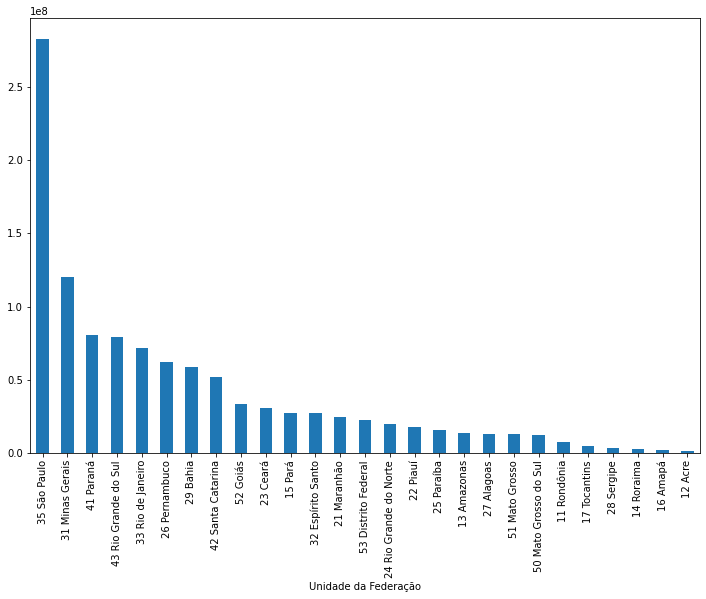

In [ ]:
#Recuperando o que foi realizado na última aula.

gastos_do_mais_recente =  gastos_do_mais_recente.sort_values(ascending=False)
gastos_do_mais_recente.plot(kind='bar', figsize = (12,8))
plt.show()

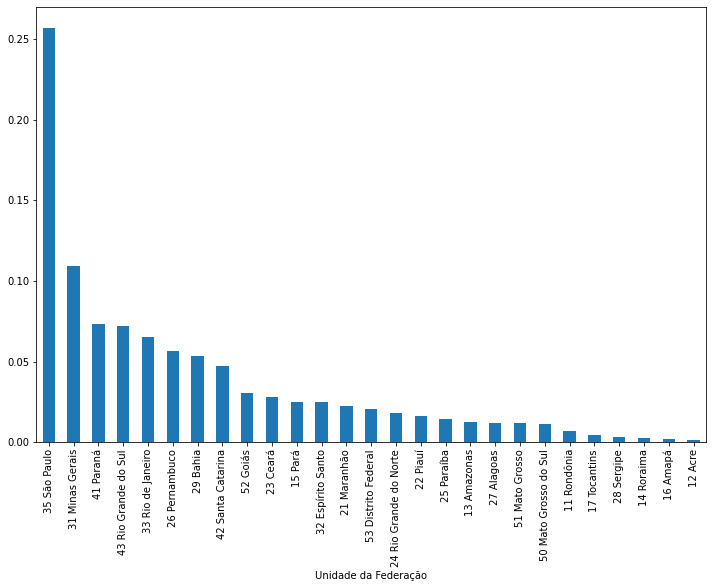

In [ ]:
#Gasto proporcional
gastos_proporcionais = gastos_do_mais_recente / gastos_do_mais_recente.sum()
gastos_proporcionais.plot(kind='bar', figsize = (12,8))
plt.show()

In [ ]:
#Lendo um arquivo de excel
fonte_excel_alura = 'https://github.com/alura-cursos/agendamento-hospitalar/blob/main/dados/estimativa_dou_2020.xls?raw=true'

populacao_estimativa = pd.read_excel(fonte_excel_alura, header=1, skipfooter=7)
populacao_estimativa.head()


BRASIL E UNIDADES DA FEDERAÇÃO  Unnamed: 1 POPULAÇÃO ESTIMADA
0                         Brasil         nan          211755692
1                   Região Norte         nan           18672591
2                       Rondônia         nan            1796460
3                           Acre         nan             894470
4                       Amazonas         nan            4207714

Aqui vemos que o excel terá o mesmo tratamento que o primeiro CSV originário do TABNET, nos deixando sempre o aprendizado que apesar de vir já mais tratado, sempre temos que atentar nos dados.

Agora será o tratamento caso tenhamos que extrair de uma tabela de um site.

In [ ]:
dados_da_populacao= '''Posição	Unidade federativa	População	% da pop. total	País comparável
(habitantes)

1	 São Paulo	46 289 333	21,9%	Flag of Spain.svg Espanha (46 439 864)
2	 Minas Gerais	21 331 292	10,1%	 Sri Lanka (20 675 000)
3	 Rio de Janeiro	17 366 189	8,2%	 Países Baixos (16 922 900)
4	Bahia Bahia	14 930 634	7,1%	 Chade (14 037 000)
5	 Paraná	11 516 840	5,4%	 Bolívia (11 410 651)
6	 Rio Grande do Sul	11 422 973	5,4%	 Bélgica (11 250 659)
7	 Pernambuco	9 616 621	4,5%	 Bielorrússia (9 485 300)
8	 Ceará	9 187 103	4,3%	 Emirados Árabes Unidos (9 157 000)
9	Pará Pará	8 690 745	4,1%	 Áustria (8 602 112)
10	 Santa Catarina	7 279 638	3,4%	 Sérvia (7 114 393)
12	 Goiás	7 142 070	3,4%	 Paraguai (7 003 406)
11	 Maranhão	7 127 460	3,4%	 Paraguai (7 003 406)
13	 Amazonas	4 228 381	2,0%	 Líbano (4 168 000)
14	 Espírito Santo	4 064 052	1,9%	 Líbano (4 168 000)
15	 Paraíba	4 039 277	1,9%	 Líbano (4 168 000)
16	 Rio Grande do Norte	3 534 165	1,7%	 Uruguai (3 415 866)
17	 Mato Grosso	3 526 220	1,7%	 Uruguai (3 415 866)
18	 Alagoas	3 351 543	1,6%	 Uruguai (3 415 866)
19	 Piauí	3 281 480	1,6%	 Kuwait (3 268 431)
20	 Distrito Federal	3 055 149	1,4%	 Lituânia (2 900 787)
21	 Mato Grosso do Sul	2 809 394	1,3%	 Jamaica (2 717 991)
22	 Sergipe	2 318 822	1,1%	 Namíbia (2 280 700)
23	 Rondônia	1 796 460	0,8%	 Gabão (1 725 000)
24	 Tocantins	1 590 248	0,7%	 Bahrein (1 359 800)
25	 Acre	894 470	0,4%	 Fiji (859 178)
26	 Amapá	861 773	0,4%	 Fiji (859 178)
27	 Roraima	631 181	0,3%	 Luxemburgo (562 958)
'''

#fonte = https://pt.wikipedia.org/wiki/Lista_de_unidades_federativas_do_Brasil_por_população

In [ ]:
dados_da_populacao

'Posição\tUnidade federativa\tPopulação\t% da pop. total\tPaís comparável\n(habitantes)\n\n1\t São Paulo\t46 289 333\t21,9%\tFlag of Spain.svg Espanha (46 439 864)\n2\t Minas Gerais\t21 331 292\t10,1%\t Sri Lanka (20 675 000)\n3\t Rio de Janeiro\t17 366 189\t8,2%\t Países Baixos (16 922 900)\n4\tBahia Bahia\t14 930 634\t7,1%\t Chade (14 037 000)\n5\t Paraná\t11 516 840\t5,4%\t Bolívia (11 410 651)\n6\t Rio Grande do Sul\t11 422 973\t5,4%\t Bélgica (11 250 659)\n7\t Pernambuco\t9 616 621\t4,5%\t Bielorrússia (9 485 300)\n8\t Ceará\t9 187 103\t4,3%\t Emirados Árabes Unidos (9 157 000)\n9\tPará Pará\t8 690 745\t4,1%\t Áustria (8 602 112)\n10\t Santa Catarina\t7 279 638\t3,4%\t Sérvia (7 114 393)\n12\t Goiás\t7 142 070\t3,4%\t Paraguai (7 003 406)\n11\t Maranhão\t7 127 460\t3,4%\t Paraguai (7 003 406)\n13\t Amazonas\t4 228 381\t2,0%\t Líbano (4 168 000)\n14\t Espírito Santo\t4 064 052\t1,9%\t Líbano (4 168 000)\n15\t Paraíba\t4 039 277\t1,9%\t Líbano (4 168 000)\n16\t Rio Grande do Norte\t

In [ ]:
from io import StringIO

#o StringIO cria como se fosse um leitor para os dados das strings em nossa variavel
dados_da_populacao_io = StringIO(dados_da_populacao)

populacao = pd.read_csv(dados_da_populacao_io, sep='\t').dropna()
populacao['populacao'] = populacao['População'].str.replace(' ','').astype(int)
populacao['uf'] = populacao['Unidade federativa']
populacao = populacao[['uf','populacao']].set_index('uf')
populacao.index = populacao.index.str.strip()
display(populacao.head())
display(populacao.info())

populacao
uf                       
São Paulo        46289333
Minas Gerais     21331292
Rio de Janeiro   17366189
Bahia Bahia      14930634
Paraná           11516840

<class 'pandas.core.frame.DataFrame'>
Index: 27 entries, São Paulo to Roraima
Data columns (total 1 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   populacao  27 non-null     int64
dtypes: int64(1)
memory usage: 432.0+ bytes


None

In [ ]:
#Retirando os códigos do IBGE e espaço
gastos_do_mais_recente.index = gastos_do_mais_recente.index.str[3:]

In [ ]:
#Deixando uma loop para deixar automatizado a adequação
for estado in gastos_do_mais_recente.index:
  populacao.index = populacao.index.str.replace(f'{estado} {estado}', estado)
populacao.index

Index(['São Paulo', 'Minas Gerais', 'Rio de Janeiro', 'Bahia', 'Paraná',
       'Rio Grande do Sul', 'Pernambuco', 'Ceará', 'Pará', 'Santa Catarina',
       'Goiás', 'Maranhão', 'Amazonas', 'Espírito Santo', 'Paraíba',
       'Rio Grande do Norte', 'Mato Grosso', 'Alagoas', 'Piauí',
       'Distrito Federal', 'Mato Grosso do Sul', 'Sergipe', 'Rondônia',
       'Tocantins', 'Acre', 'Amapá', 'Roraima'],
      dtype='object', name='uf')

In [ ]:
#Realizando o join entre nosso novo dataframe de população com o gasto mais recente

gastos_e_populacao_recente = populacao.join(gastos_do_mais_recente)
gastos_e_populacao_recente.head()

populacao     2020/Jul
uf                                    
São Paulo        46289333 282709570.31
Minas Gerais     21331292 120467187.34
Rio de Janeiro   17366189  71540227.33
Bahia            14930634  58898100.40
Paraná           11516840  80320852.69

### <font color = #1f004d> **Desafios**

#### <font color = #1f004d> **Desafio 01: Ler esse arquivo direto do wikipedia (html).**

Utilizando o método read_html que lê as tabelas direto de uma página, no nosso caso como temos 3 tabelas, teremos que informar qual estaremos utilizando após o carregamento.

In [ ]:
from urllib.parse import quote

fonte_wiki = 'https://pt.wikipedia.org/wiki/Lista_de_unidades_federativas_do_Brasil_por_população'

tabelas_wiki = pd.read_html(quote(fonte_wiki, safe=':/'),
                      encoding='utf-8',
                      thousands=' ')

In [ ]:
tabelas_wiki[0].head()

Posição Unidade federativa  ...  % da pop. total País comparável (habitantes)
0        1          São Paulo  ...            21,9%         Espanha (46 439 864)
1        2       Minas Gerais  ...            10,1%       Sri Lanka (20 675 000)
2        3     Rio de Janeiro  ...             8,2%   Países Baixos (16 922 900)
3        4              Bahia  ...             7,1%           Chade (14 037 000)
4        5             Paraná  ...             5,4%         Bolívia (11 410 651)

[5 rows x 5 columns]

#### <font color = #1f004d> **Desafio 02 - Neste desafio temos uma série de passos:**

* Padronizar os nomes das colunas
* Transformar os dados nos tipos corretos
* Transformar a UF em index

In [ ]:
populacao_ibge = tabelas_wiki[0].iloc[:, 1:3].rename(columns={'Unidade federativa' : 'uf', 'População' : 'populacao'})\
                 .set_index('uf')

In [ ]:
populacao_ibge.head()

populacao
uf                       
São Paulo        46289333
Minas Gerais     21331292
Rio de Janeiro   17366189
Bahia            14930634
Paraná           11516840

In [ ]:
populacao_ibge.dtypes

populacao    int64
dtype: object

#### <font color = #1f004d> **Desafio 03 - Buscar na documentação alguns métodos envolvendo strings**

In [ ]:
url = 'https://www.tutorialspoint.com/python/python_strings.htm'
tabelas = pd.read_html(url)

In [ ]:
print('Alguns métodos de string extraídos do Tutorials Point:')
tabelas[4].set_index('Sr.No.')

Alguns métodos de string extraídos do Tutorials Point:


Methods with Description
Sr.No.                                                   
1         capitalize() Capitalizes first letter of string
2       center(width, fillchar) Returns a space-padded...
3       count(str, beg= 0,end=len(string)) Counts how ...
4       decode(encoding='UTF-8',errors='strict') Decod...
5       encode(encoding='UTF-8',errors='strict') Retur...
6       endswith(suffix, beg=0, end=len(string)) Deter...
7       expandtabs(tabsize=8) Expands tabs in string t...
8       find(str, beg=0 end=len(string)) Determine if ...
9       index(str, beg=0, end=len(string)) Same as fin...
10      isalnum() Returns true if string has at least ...
11      isalpha() Returns true if string has at least ...
12      isdigit() Returns true if string contains only...
13      islower() Returns true if string has at least ...
14      isnumeric() Returns true if a unicode string c...
15      isspace() Returns true if string contains only...
16      istitle() Returns true if string is properly "...
17      isupper() Returns true if string has at least ...
18      join(seq) Merges (concatenates) the string rep...
19           len(string) Returns the length of the string
20      ljust(width[, fillchar]) Returns a space-padde...
21      lower() Converts all uppercase letters in stri...
22      lstrip() Removes all leading whitespace in str...
23      maketrans() Returns a translation table to be ...
24      max(str) Returns the max alphabetical characte...
25      min(str) Returns the min alphabetical characte...
26      replace(old, new [, max]) Replaces all occurre...
27      rfind(str, beg=0,end=len(string)) Same as find...
28      rindex( str, beg=0, end=len(string)) Same as i...
29      rjust(width,[, fillchar]) Returns a space-padd...
30      rstrip() Removes all trailing whitespace of st...
31      split(str="", num=string.count(str)) Splits st...
32      splitlines( num=string.count('\n')) Splits str...
33      startswith(str, beg=0,end=len(string)) Determi...
34      strip([chars]) Performs both lstrip() and rstr...
35      swapcase() Inverts case for all letters in str...
36      title() Returns "titlecased" version of string...
37      translate(table, deletechars="") Translates st...
38      upper() Converts lowercase letters in string t...
39      zfill (width) Returns original string leftpadd...
40      isdecimal() Returns true if a unicode string c...

#### <font color = #1f004d> **Desafio 04 - Desenvolver uma função para a limpeza e tratamento dos dados, retornando duas tabelas "população" e "unida".**

In [ ]:
def limpeza_tratamento_uniao_dados(data_texto, data_com_valores, colunas_desejadas, indice):
  '''Lê arquivo apenas texto e transforma em um dataframe, 
    Retirar os espaços e transformar em número
    Separa um dataframe apenas para com as colunas desejadas
    Trata índice com nome duplicado
    Realiza o join entre os dataframes.

    Variáveis: 
    data_texto -> Dataframe em formato de string
    data_com_valores -> dataframe que contem os valores que serão unificados
    colunas_desejadas -> lista de colunas que queres manter
    indice -> coloca como indice a coluna

    Requisitos:
    Pandas
    StringIO
    unidecode


    Retorno:
    Uma tupla com dois datasets: tratado e unido
  '''
  
  #Importando as bibliotecas
  import pandas as pd
  from io import StringIO
  from unidecode import unidecode

  #realizando a trasnsformação do texto em uma entrada de texto
  data_texto_io = StringIO(data_texto)
  data_texto_csv = pd.read_csv(data_texto_io, sep='\t').dropna()

  #criando nova lista de nomes de colunas que irei tratar
  novo_nome = []
  #tratando os nomes das colunas, retirando todos os acentos e ç
  #neste caso como iremos usar o uf como base, já irei criar este tratamento
  for i in range(len(data_texto_csv.columns)):
    novo_nome.append(unidecode(data_texto_csv.columns[i]).lower())
    if novo_nome[i] == 'unidade federativa':
      novo_nome[i] = 'uf'

  #criado o dicionario para renomear as colunas
  dict_nome = dict(zip(data_texto_csv.columns,novo_nome))

  #renomeando as colunas
  data_texto_csv = data_texto_csv.rename(columns=dict_nome)

  #alterando o tipo para inteiro da populacao
  data_texto_csv['populacao'] = data_texto_csv['populacao'].str.replace(' ','').astype(int)

  #inicalmente deixarei esta linha de código para tratar o nome das colunas
  data_com_valores_copia = data_com_valores.copy()
  data_com_valores_copia.index = data_com_valores_copia.index.str[3:]

  # arrumando os nomes dos estados que duplicam
  for estado in data_com_valores_copia.index:
    data_texto_csv['uf'] = data_texto_csv['uf'].str.replace(f'{estado} {estado}', estado)

  #selecionando as colunas
  data_texto_csv = data_texto_csv[colunas_desejadas]

  #selecionando o novo indice
  data_texto_csv = data_texto_csv.set_index(indice)

  #arrumando o indice, retirando espaços
  data_texto_csv.index = data_texto_csv.index.str.strip()

  #união dos datasets
  data_unida = data_texto_csv.join(data_com_valores_copia)

  return (data_texto_csv, data_unida)


In [ ]:
#trouxe a criação para este ponto do notebook, pois anteiormente tratamos os dados
gastos_do_mais_recente =  ordenado_por_total[mes_mais_recente]
colunas = ['uf', 'populacao']
pop, all = limpeza_tratamento_uniao_dados(dados_da_populacao, gastos_do_mais_recente, colunas , 'uf')
display(pop.head(), all.head())

populacao
uf                       
São Paulo        46289333
Minas Gerais     21331292
Rio de Janeiro   17366189
Bahia            14930634
Paraná           11516840

populacao     2020/Jul
uf                                    
São Paulo        46289333 282709570.31
Minas Gerais     21331292 120467187.34
Rio de Janeiro   17366189  71540227.33
Bahia            14930634  58898100.40
Paraná           11516840  80320852.69

---
##<font color = #944dff>  **Aula 2**
---

#### <font color = #8533ff> **2.1 - Visualização, Seaborn e Proporcionalidades**

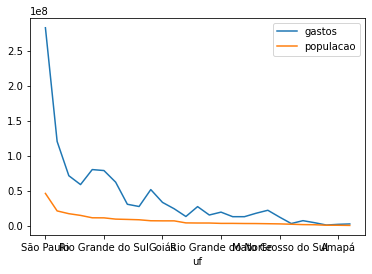

In [ ]:
#horripilante (data visualization)
gastos_e_populacao_recente['gastos'] = gastos_e_populacao_recente['2020/Jul'] #tirei a mult
gastos_e_populacao_recente[['gastos', 'populacao']].plot()
plt.show()

In [ ]:
gastos_e_populacao_recente.loc[['Rio Grande do Sul', 'São Paulo']]

populacao     2020/Jul       gastos
uf                                                    
Rio Grande do Sul   11422973  78929703.81  78929703.81
São Paulo           46289333 282709570.31 282709570.31

In [ ]:
gastos_e_populacao_recente['gasto_por_habitante'] = gastos_e_populacao_recente['gastos'] / gastos_e_populacao_recente['populacao']
gastos_e_populacao_recente.head()

populacao     2020/Jul       gastos  gasto_por_habitante
uf                                                                      
São Paulo        46289333 282709570.31 282709570.31                 6.11
Minas Gerais     21331292 120467187.34 120467187.34                 5.65
Rio de Janeiro   17366189  71540227.33  71540227.33                 4.12
Bahia            14930634  58898100.40  58898100.40                 3.94
Paraná           11516840  80320852.69  80320852.69                 6.97

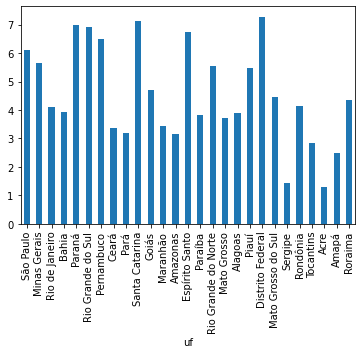

In [ ]:
gastos_e_populacao_recente['gasto_por_habitante'].plot(kind='bar')

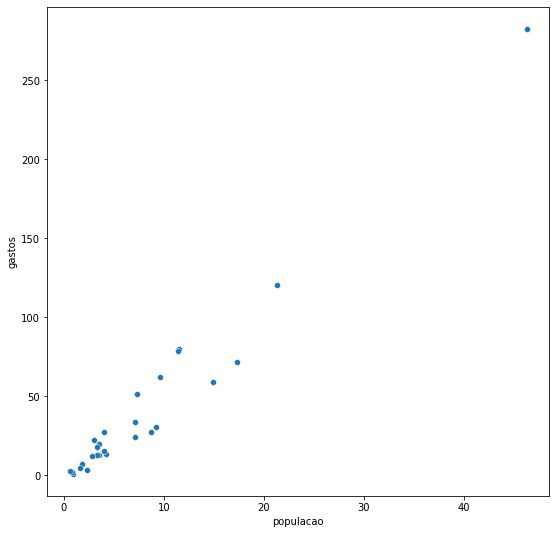

In [ ]:
plt.figure(figsize=(9,9))
sns.scatterplot(data=gastos_e_populacao_recente / 1000000, x='populacao', y='gastos')
plt.show()

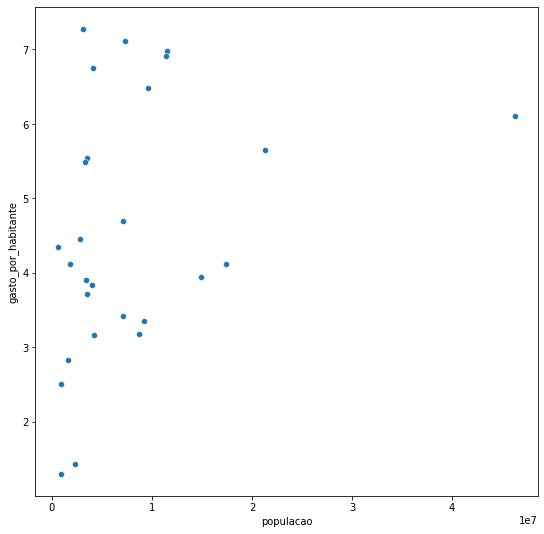

In [ ]:
plt.figure(figsize=(9,9))
sns.scatterplot(data=gastos_e_populacao_recente, x='populacao', y='gasto_por_habitante')
plt.show()

### <font color = #1f004d> **Desafios**

#### <font color = #1f004d> **Desafio 01: Ordenar o gráfico e criar uma visualização de gastos por habitantes ordenada.**

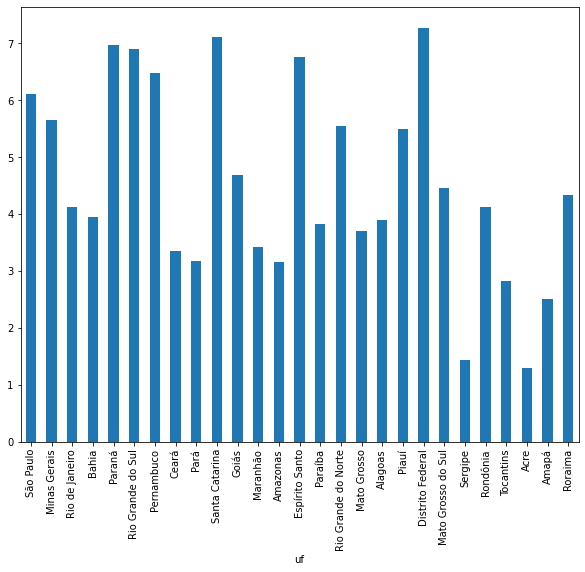

In [ ]:
gastos_e_populacao_recente['gasto_por_habitante'].plot(kind='bar', figsize=(10, 8))

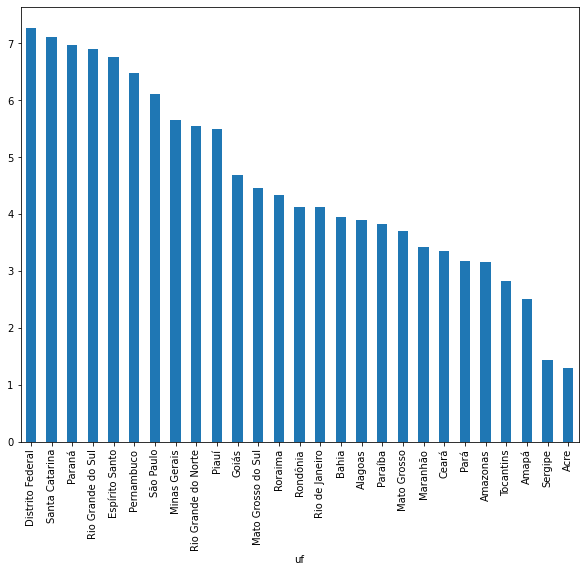

In [ ]:
#Gráfico ordenado 
gastos_e_populacao_recente.sort_values(by='gasto_por_habitante', ascending=False)['gasto_por_habitante'].plot(kind='bar', figsize=(10, 8))
plt.show()

#### <font color = #1f004d> **Desafio 02 (Super Desafio Gui): Fazer os mesmos gráficos do final da aulas 2.1 para meses anteriores, analisar e compartilhar suas hipóteses.**

Antes de iniciar, vamos já tratar os dados deste desafio e do próximo a fim de organizar o estudo e acelerar o trabalho.

In [ ]:
#iniciando com a base sem tratamento:
#selecionando as colunas de 2020
select_2020 = ordenado_por_total.columns[ordenado_por_total.columns.str.startswith('2020')]
#fazendo a selecao do dataframe com as colunas que queremos
ordenado_por_total_2020 = ordenado_por_total[select_2020]
#chamando a funcao criada anteriormente para celeridade
pop, gastos_e_populacao_2020 = limpeza_tratamento_uniao_dados(dados_da_populacao, ordenado_por_total_2020, colunas , 'uf')


In [ ]:
def calcular_gasto_por_habitante(data_principal):
  '''
  Iremos calcular os gastos por habitante nas colunas de meses
  '''
  colunas_a_calcular = data_principal.columns[data_principal.columns.str.startswith('2020')]

  for mes in colunas_a_calcular:
    data_principal[f'gasto_por_hab_{mes}'] = data_principal[mes] / data_principal['populacao']
  
  return data_principal


In [ ]:
gastos_e_populacao_2020_copia = gastos_e_populacao_2020.copy()

gastos_e_populacao_2020_copia = calcular_gasto_por_habitante(gastos_e_populacao_2020_copia)
gastos_e_populacao_2020_copia.head()

populacao  ...  gasto_por_hab_2020/Jul
uf                         ...                        
São Paulo        46289333  ...                    6.11
Minas Gerais     21331292  ...                    5.65
Rio de Janeiro   17366189  ...                    4.12
Bahia            14930634  ...                    3.94
Paraná           11516840  ...                    6.97

[5 rows x 15 columns]

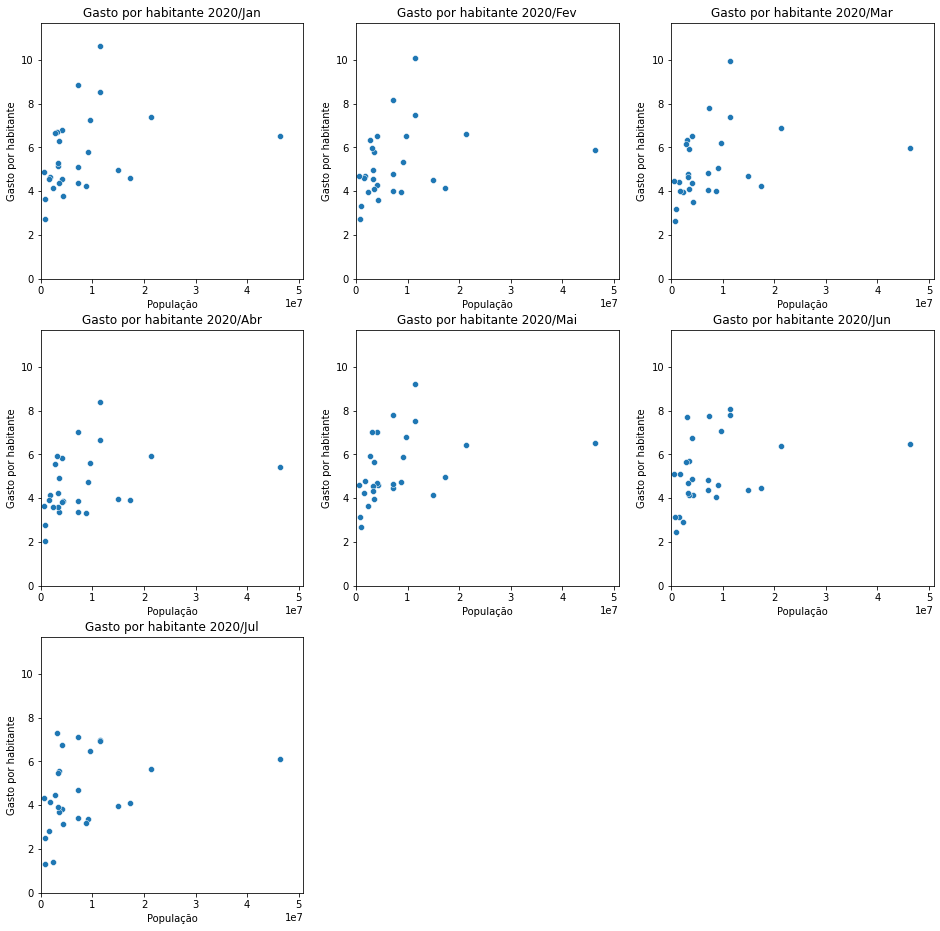

In [ ]:
plt.figure(figsize=(16,16))

meses = gastos_e_populacao_2020_copia.columns[gastos_e_populacao_2020_copia.columns.str.startswith('2020')]
posicao = len(meses)

for mes in range(len(meses)):
  plt.subplot(3,3, mes+1)
  sns.scatterplot(data=gastos_e_populacao_2020_copia, x='populacao', y=gastos_e_populacao_2020_copia[f'gasto_por_hab_{meses[mes]}'])
  plt.ylim(0, max(gastos_e_populacao_2020_copia['gasto_por_hab_2020/Jan'])*1.1)
  plt.xlim(0, max(gastos_e_populacao_2020_copia['populacao'])*1.1)
  plt.title(f'Gasto por habitante {meses[mes]}')
  plt.ylabel('Gasto por habitante')
  plt.xlabel('População')
plt.show()

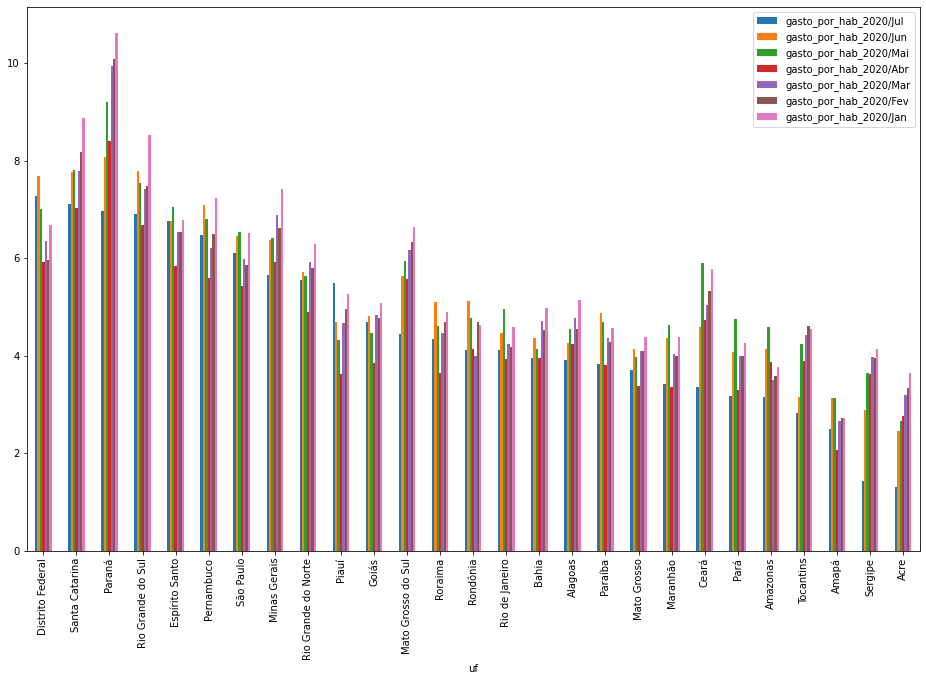

In [ ]:
#Criando o mesmo gráfico de barras para todos os meses
selecao_plot_meses = ['gasto_por_hab_2020/Jul','gasto_por_hab_2020/Jun', 'gasto_por_hab_2020/Mai', 'gasto_por_hab_2020/Abr', 'gasto_por_hab_2020/Mar', 'gasto_por_hab_2020/Fev', 'gasto_por_hab_2020/Jan']
gastos_e_populacao_2020_copia.sort_values('gasto_por_hab_2020/Jul', ascending =False)[selecao_plot_meses].plot(kind='bar', figsize=(16,10))
plt.show()

In [ ]:
gastos_e_populacao_2020_plot = gastos_e_populacao_2020_copia[gastos_e_populacao_2020_copia.columns[gastos_e_populacao_2020_copia.columns.str.startswith('gasto_por_hab_2020')]]
gastos_e_populacao_2020_plot.head()

gasto_por_hab_2020/Jan  ...  gasto_por_hab_2020/Jul
uf                                      ...                        
São Paulo                         6.52  ...                    6.11
Minas Gerais                      7.41  ...                    5.65
Rio de Janeiro                    4.59  ...                    4.12
Bahia                             4.98  ...                    3.94
Paraná                           10.62  ...                    6.97

[5 rows x 7 columns]

In [ ]:
gastos_e_populacao_2020_plot = gastos_e_populacao_2020_plot.melt(ignore_index=False)
gastos_e_populacao_2020_plot.head()

variable  value
uf                                           
São Paulo       gasto_por_hab_2020/Jan   6.52
Minas Gerais    gasto_por_hab_2020/Jan   7.41
Rio de Janeiro  gasto_por_hab_2020/Jan   4.59
Bahia           gasto_por_hab_2020/Jan   4.98
Paraná          gasto_por_hab_2020/Jan  10.62

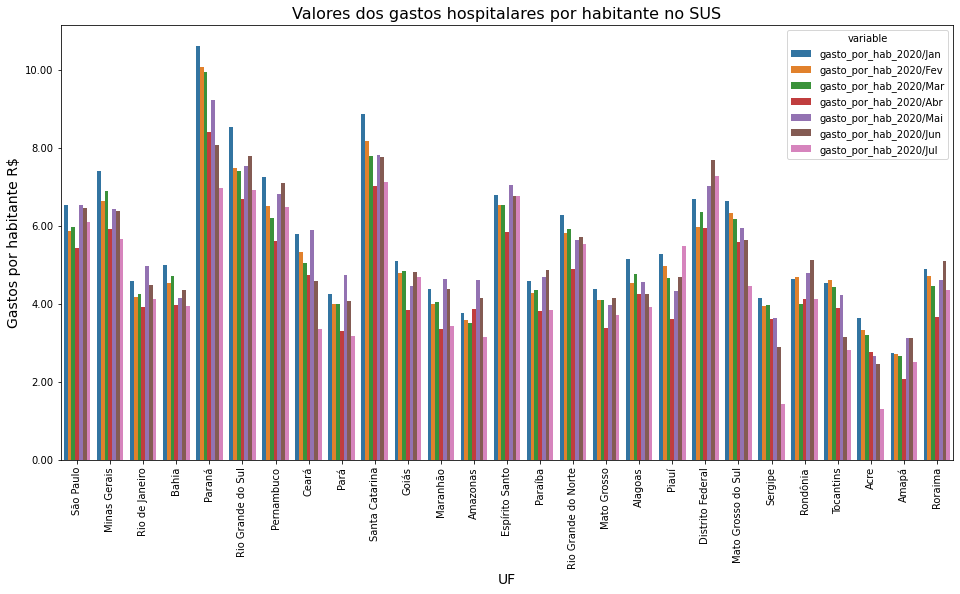

In [ ]:
ax = sns.barplot(data=gastos_e_populacao_2020_plot, x=gastos_e_populacao_2020_plot.index, y='value', hue='variable')
ax.figure.set_size_inches(16, 8)
ax.set_title('Valores dos gastos hospitalares por habitante no SUS', fontsize = 16)
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter("{x:,.2f}"))
ax.set_xlabel('UF', fontsize= 14)
ax.set_ylabel('Gastos por habitante R$', fontsize = 14)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
plt.show()

#### <font color = #1f004d> **Desafio 03 (Super Desafio Thiago): Plotar no mesmos gráficos do final da aula o mês anterior e o mês corrente, analisar e compartilhar suas hipóteses.**

Restringindo os meses anteriores apenas a 3 meses, Julho, Junho e Maio a fim de termos uma visualização melhor.

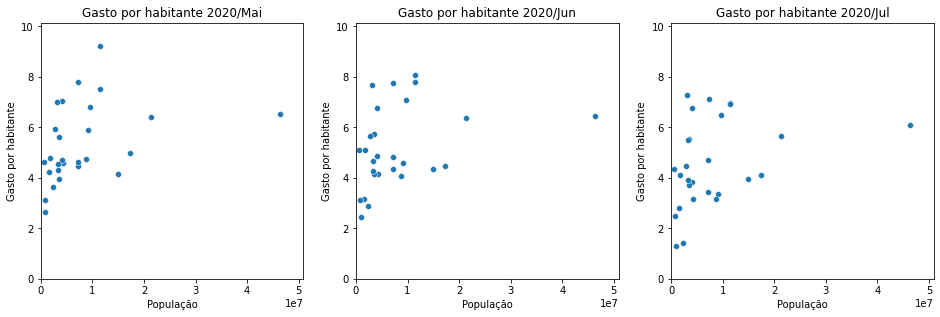

In [ ]:
plt.figure(figsize=(16,16))

meses_3 = ['2020/Mai','2020/Jun','2020/Jul']

for mes in range(len(meses_3)):
  plt.subplot(3,3,mes+1)
  sns.scatterplot(data=gastos_e_populacao_2020_copia, x='populacao', y=gastos_e_populacao_2020_copia[f'gasto_por_hab_{meses_3[mes]}'])
  plt.ylim(0, max(gastos_e_populacao_2020_copia['gasto_por_hab_2020/Mai'])*1.1)
  plt.xlim(0, max(gastos_e_populacao_2020_copia['populacao'])*1.1)
  plt.title(f'Gasto por habitante {meses_3[mes]}')
  plt.ylabel('Gasto por habitante')
  plt.xlabel('População')
plt.show()

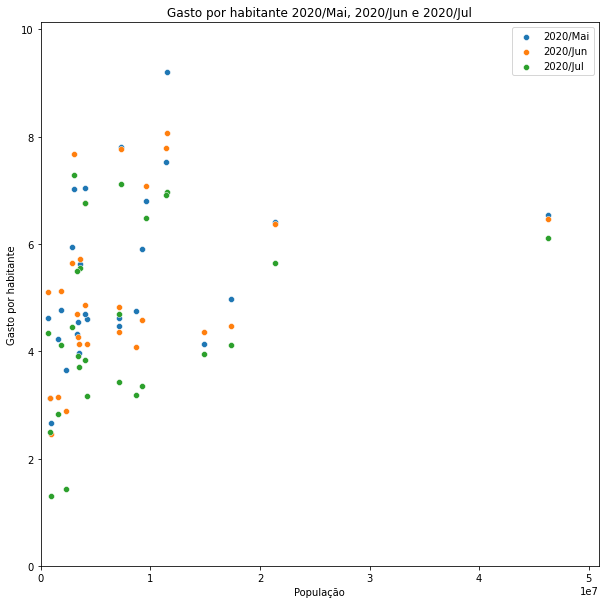

In [ ]:
plt.figure(figsize=(10,10))

meses_3 = ['2020/Mai','2020/Jun','2020/Jul']

for mes in range(len(meses_3)):
  sns.scatterplot(data=gastos_e_populacao_2020_copia, x='populacao', y=gastos_e_populacao_2020_copia[f'gasto_por_hab_{meses_3[mes]}'], label=f'{meses_3[mes]}')
  plt.ylim(0, max(gastos_e_populacao_2020_copia['gasto_por_hab_2020/Mai'])*1.1)
  plt.xlim(0, max(gastos_e_populacao_2020_copia['populacao'])*1.1)
  plt.ylabel('Gasto por habitante')
  plt.xlabel('População')
plt.title(f'Gasto por habitante {meses_3[0]}, {meses_3[1]} e {meses_3[2]}')
plt.legend()
plt.show()

In [ ]:
gastos_e_populacao_2020_plot_novo = gastos_e_populacao_2020_copia[['gasto_por_hab_2020/Mai',	'gasto_por_hab_2020/Jun',	'gasto_por_hab_2020/Jul']]
gastos_e_populacao_2020_plot_novo.head()


gasto_por_hab_2020/Mai  ...  gasto_por_hab_2020/Jul
uf                                      ...                        
São Paulo                         6.54  ...                    6.11
Minas Gerais                      6.42  ...                    5.65
Rio de Janeiro                    4.97  ...                    4.12
Bahia                             4.14  ...                    3.94
Paraná                            9.21  ...                    6.97

[5 rows x 3 columns]

In [ ]:
gastos_e_populacao_2020_plot_novo = gastos_e_populacao_2020_plot_novo.melt(ignore_index=False)
gastos_e_populacao_2020_plot_novo.head()

variable  value
uf                                           
São Paulo       gasto_por_hab_2020/Mai   6.54
Minas Gerais    gasto_por_hab_2020/Mai   6.42
Rio de Janeiro  gasto_por_hab_2020/Mai   4.97
Bahia           gasto_por_hab_2020/Mai   4.14
Paraná          gasto_por_hab_2020/Mai   9.21

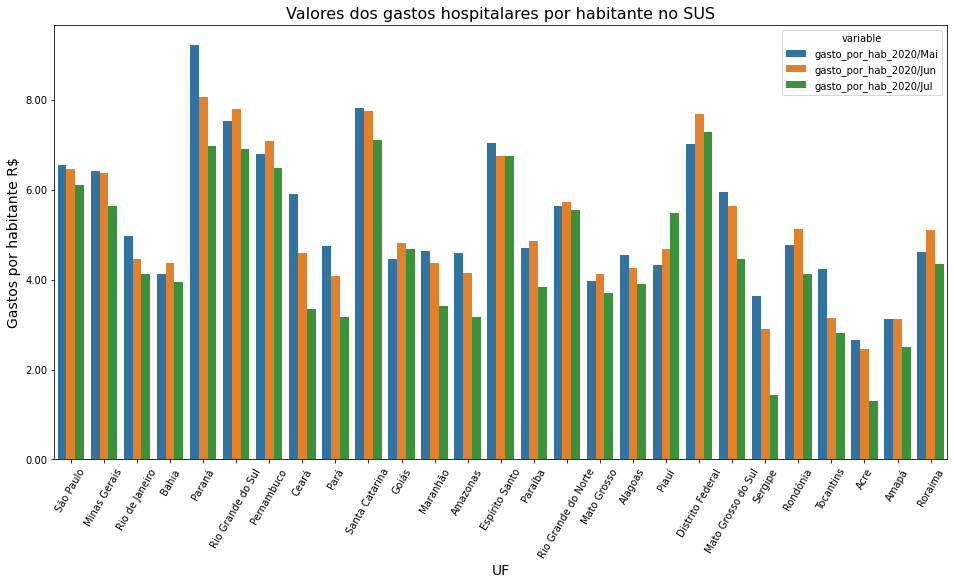

In [ ]:
ax = sns.barplot(data=gastos_e_populacao_2020_plot_novo, x=gastos_e_populacao_2020_plot_novo.index, y='value', hue='variable')
ax.figure.set_size_inches(16, 8)
ax.set_title('Valores dos gastos hospitalares por habitante no SUS', fontsize = 16)
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter("{x:,.2f}"))
ax.set_xlabel('UF', fontsize= 14)
ax.set_ylabel('Gastos por habitante R$', fontsize = 14)
ax.set_xticklabels(ax.get_xticklabels(), rotation=60)
plt.show()

#### <font color = #1f004d> **Desafio 04 (Próximo Vídeo): Analise os gráficos e tente chegar a hipóteses que explicam o que você está entendendo dos dados. Lembre-se que a conclusão é uma hipótese. E que esses dados serão alterados.**

Resolução do Guilherme e Thiago.

In [ ]:
def insere_gastos_e_gasto_por_habitante_para(todos_os_gastos,dados, mes:str):
    gastos_do_mes = todos_os_gastos[mes]
    gastos_do_mes.index = gastos_do_mes.index.str[3:]
    dados[f"gastos_{mes}"] =  gastos_do_mes 
    dados[f"gasto_por_habitante_{mes}"] = dados[f"gastos_{mes}"] / dados["populacao"]

In [ ]:
insere_gastos_e_gasto_por_habitante_para(ordenado_por_total, gastos_e_populacao_recente, '2020/Jul')

In [ ]:
gastos_e_populacao_recente.head()

populacao  ...  gasto_por_habitante_2020/Jul
uf                         ...                              
São Paulo        46289333  ...                          6.11
Minas Gerais     21331292  ...                          5.65
Rio de Janeiro   17366189  ...                          4.12
Bahia            14930634  ...                          3.94
Paraná           11516840  ...                          6.97

[5 rows x 6 columns]

In [ ]:
insere_gastos_e_gasto_por_habitante_para(ordenado_por_total, gastos_e_populacao_recente, '2020/Jun')
gastos_e_populacao_recente.head()

populacao  ...  gasto_por_habitante_2020/Jun
uf                         ...                              
São Paulo        46289333  ...                          6.46
Minas Gerais     21331292  ...                          6.37
Rio de Janeiro   17366189  ...                          4.47
Bahia            14930634  ...                          4.36
Paraná           11516840  ...                          8.07

[5 rows x 8 columns]

---
##<font color = #944dff>  **Aula 3**
---

#### <font color = #8533ff> **3.1 - Formatação de ticks e escalas**


In [ ]:
ordenado_por_total.index = ordenado_por_total.index.str[3:]


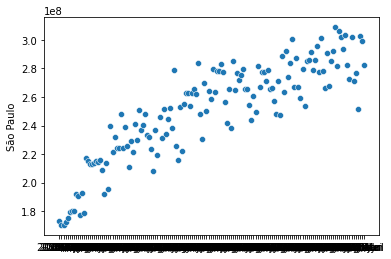

In [ ]:
sns.scatterplot( x=ordenado_por_total.columns, y=ordenado_por_total.loc['São Paulo'])

In [ ]:
mensal = ordenado_por_total.T
mensal.head(2)

Unidade da Federação    São Paulo  Minas Gerais  ...   Roraima      Amapá
2008/Fev             172834914.73   70301089.50  ... 771687.83 1275063.72
2008/Mar             170481849.56   79119005.51  ... 876091.18 1177745.93

[2 rows x 27 columns]

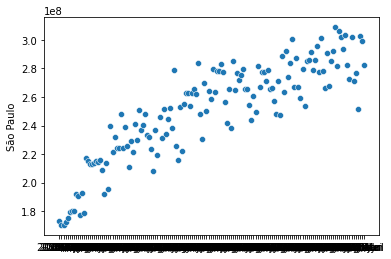

In [ ]:
sns.scatterplot(data=mensal, x=mensal.index, y='São Paulo')

Aqui aprendemos a usar os ticker para setar melhores vizualizações do eixo X. 

Usamos inicialmente o AutoLocator e depois o IndexLocator.

Aprendemos o linestyle para grid, relembramos os limites de y.

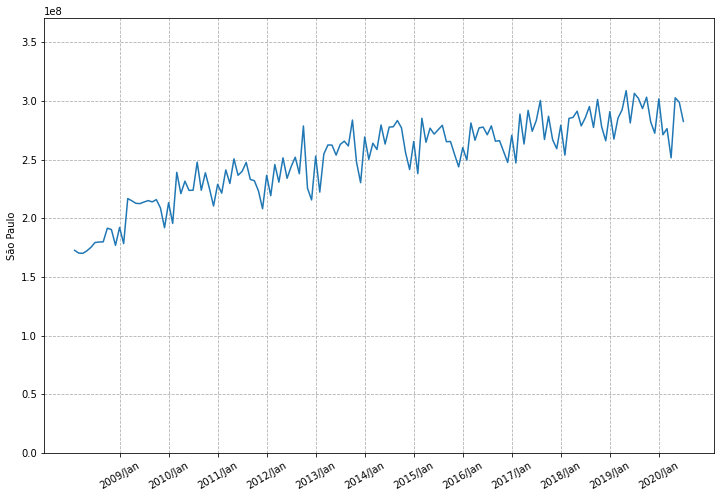

In [ ]:
plt.figure(figsize=(12,8))
ax = sns.lineplot(data=mensal, x=mensal.index, y='São Paulo')
plt.xticks(rotation=30)
plt.ylim(0,max(mensal['São Paulo'])*1.2)
ax.xaxis.set_major_locator(ticker.IndexLocator(base=12,offset=11))
plt.grid(linestyle='--')
plt.show()

### <font color = #1f004d> **Desafios**

#### <font color = #1f004d> **Desafio 01: Fazer o scatter plot feito em aula para o seu estado, leia um pouco da documentação sobre este gráfico e teste alguns parâmetros.**

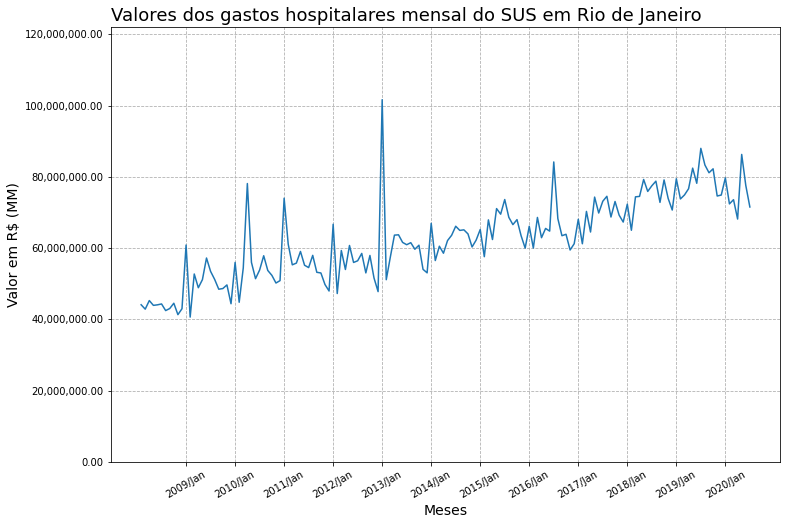

In [ ]:
plt.figure(figsize=(12,8))
ax = sns.lineplot(data=mensal, x=mensal.index, y='Rio de Janeiro')
#limite y
plt.ylim(0,max(mensal['Rio de Janeiro'])*1.2)

#formatando os eixos
plt.xticks(rotation=30)
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter("{x:,.2f}"))
ax.xaxis.set_major_locator(ticker.IndexLocator(base=12,offset=11))
ax.set_xlabel('Meses', fontsize= 14)
ax.set_ylabel('Valor em R$ (MM)', fontsize= 14)
#grid
plt.grid(linestyle='--')
#titulo
plt.title('Valores dos gastos hospitalares mensal do SUS em Rio de Janeiro', fontsize=18, loc='left')
plt.show()

#### <font color = #1f004d> **Desafio 02: Formatar o eixo y colocando a escala em milhões usando o StrMethodFormatter, colocar um título e colocar o título nos 2 eixos, alterando os tamanhos dos títulos.**



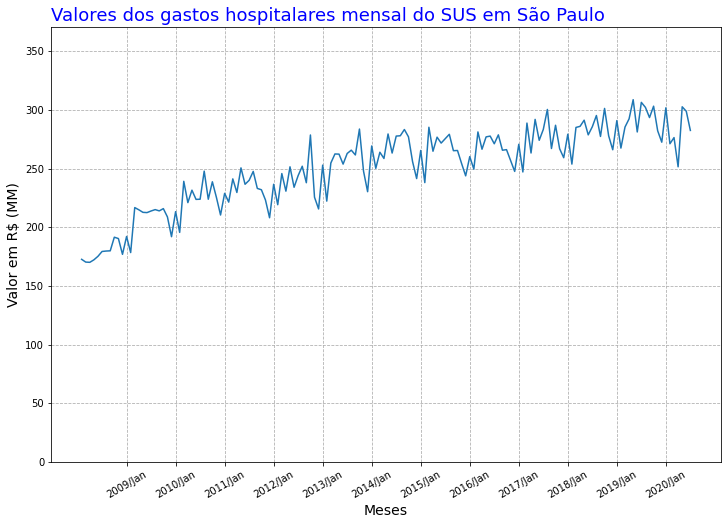

In [ ]:
plt.figure(figsize=(12,8))
ax = sns.lineplot(data=mensal/1000000, x=mensal.index, y='São Paulo')
#limite y
plt.ylim(0,max((mensal['São Paulo'])*1.2)/1000000)

#formatando os eixos
plt.xticks(rotation=30)
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter("{x:,.0f}"))
ax.xaxis.set_major_locator(ticker.IndexLocator(base=12,offset=11))
ax.set_xlabel('Meses', fontsize= 14)
ax.set_ylabel('Valor em R$ (MM)', fontsize= 14)
#grid
plt.grid(linestyle='--')
#titulo
plt.title('Valores dos gastos hospitalares mensal do SUS em São Paulo', fontsize=18, loc='left', color='b')
plt.show()

---
##<font color = #944dff>  **Aula 4**
---

#### <font color = #8533ff> **4.1 - Datas com Datetime**


Aqui aprendemos a importar o datetime para criar datas e tratamento com datas!

In [ ]:
from datetime import datetime
from datetime import date

Criamos um dicionário para os meses e uma função para mapear os anos e meses, transformando em dias.

In [ ]:
meses = {
    'Jan': 1,
    'Fev': 2,
    'Mar': 3,
    'Abr': 4,
    'Mai': 5,
    'Jun': 6,
    'Jul': 7,
    'Ago': 8,
    'Set': 9,
    'Out': 10,
    'Nov': 11,
    'Dez': 12
}

def para_dia(ano_mes):
  ano: int = int(ano_mes[:4])
  mes: str = ano_mes[5:]
  mes_numero = meses[mes]
  return date(ano,mes_numero,1)

mensal.index = mensal.index.map(para_dia)

In [ ]:
mensal.head()

Unidade da Federação    São Paulo  Minas Gerais  ...    Roraima      Amapá
2008-02-01           172834914.73   70301089.50  ...  771687.83 1275063.72
2008-03-01           170481849.56   79119005.51  ...  876091.18 1177745.93
2008-04-01           170278285.95   79046322.41  ...  896952.53 1396371.51
2008-05-01           172402180.59   79268070.12  ... 1027288.73 1411520.77
2008-06-01           175416595.83   79608652.53  ...  938293.54 1420892.01

[5 rows x 27 columns]

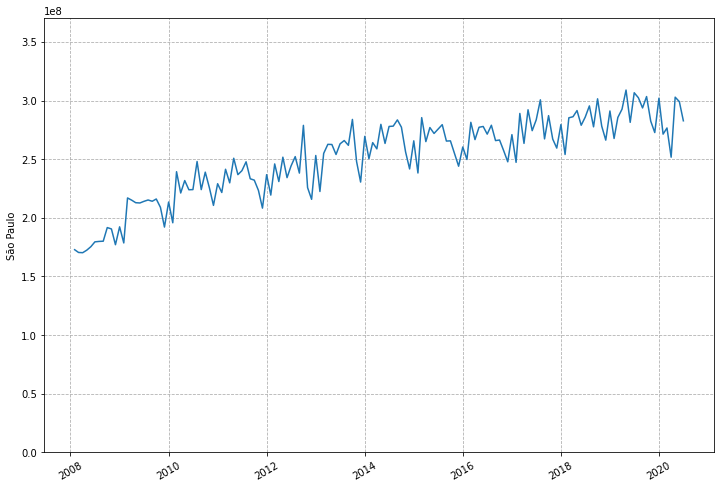

In [ ]:
plt.figure(figsize=(12,8))
ax = sns.lineplot(data=mensal, x=mensal.index, y='São Paulo')
plt.xticks(rotation=30)
plt.ylim(0,max(mensal['São Paulo'])*1.2)
#ax.xaxis.set_major_locator(ticker.IndexLocator(base=12,offset=11))
plt.grid(linestyle='--')
plt.show()

In [ ]:
mensal.info()

<class 'pandas.core.frame.DataFrame'>
Index: 150 entries, 2008-02-01 to 2020-07-01
Data columns (total 27 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   São Paulo            150 non-null    float64
 1   Minas Gerais         150 non-null    float64
 2   Paraná               150 non-null    float64
 3   Rio Grande do Sul    150 non-null    float64
 4   Rio de Janeiro       150 non-null    float64
 5   Bahia                150 non-null    float64
 6   Pernambuco           150 non-null    float64
 7   Santa Catarina       150 non-null    float64
 8   Ceará                150 non-null    float64
 9   Goiás                150 non-null    float64
 10  Pará                 150 non-null    float64
 11  Maranhão             150 non-null    float64
 12  Espírito Santo       150 non-null    float64
 13  Rio Grande do Norte  150 non-null    float64
 14  Paraíba              150 non-null    float64
 15  Distrito Federal     150 non-

O índice quando chamado retorna que é um objeto do pandas.

In [ ]:
mensal.index

Index([2008-02-01, 2008-03-01, 2008-04-01, 2008-05-01, 2008-06-01, 2008-07-01,
       2008-08-01, 2008-09-01, 2008-10-01, 2008-11-01,
       ...
       2019-10-01, 2019-11-01, 2019-12-01, 2020-01-01, 2020-02-01, 2020-03-01,
       2020-04-01, 2020-05-01, 2020-06-01, 2020-07-01],
      dtype='object', length=150)

Verificamos aqui que o índice agora é uma data.

In [ ]:
mensal.index[0]

datetime.date(2008, 2, 1)

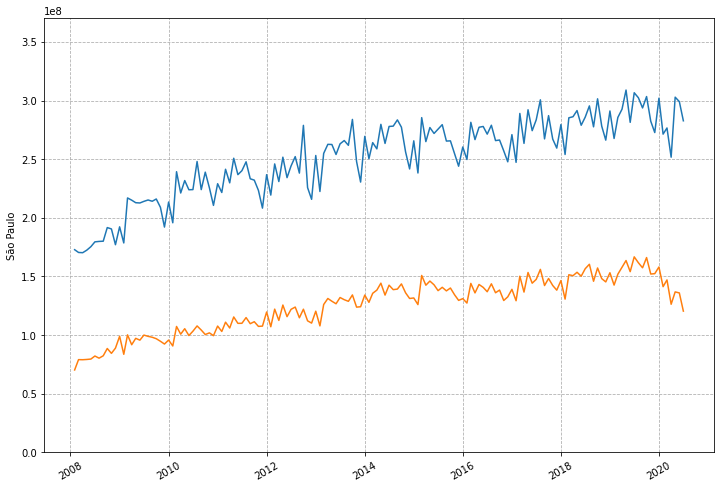

In [ ]:
plt.figure(figsize=(12,8))
ax = sns.lineplot(data=mensal, x=mensal.index, y='São Paulo')
ax = sns.lineplot(data=mensal, x=mensal.index, y='Minas Gerais')
plt.xticks(rotation=30)
plt.ylim(0,max(mensal['São Paulo'])*1.2)
plt.grid(linestyle='--')
plt.show()

#  problemas:
#1. eixos
#2. legenda
#3. sério mesmo? copy and paste das linhas do gráfico?

```
MESES       VALOR     ESTADO
2008-03     170.48    Sao Paulo
2008-03      79.12    Minas Gerais
```

In [ ]:
mensal_aberto = mensal.reset_index().melt(id_vars=['index'], value_vars=mensal.columns)
mensal_aberto.columns = ['mes','uf', 'gasto']
mensal_aberto.head()

mes         uf        gasto
0  2008-02-01  São Paulo 172834914.73
1  2008-03-01  São Paulo 170481849.56
2  2008-04-01  São Paulo 170278285.95
3  2008-05-01  São Paulo 172402180.59
4  2008-06-01  São Paulo 175416595.83

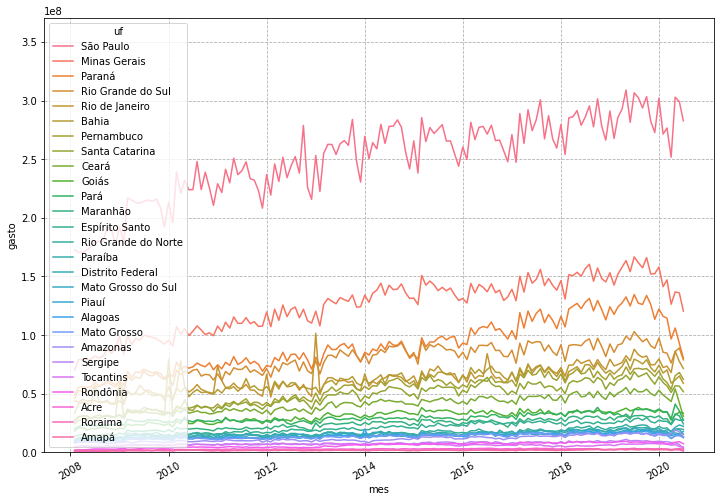

In [ ]:
plt.figure(figsize=(12,8))
ax = sns.lineplot(data=mensal_aberto, x='mes', y='gasto', hue='uf')
plt.xticks(rotation=30)
plt.ylim(0,max(mensal['São Paulo'])*1.2)
plt.grid(linestyle='--')
plt.show()


### <font color = #1f004d> **Desafios**

#### <font color = #1f004d> **Desafio 01: Estudar a documentação DateTime do Python, escolha dois métodos para se aprofundar faça alguns testes e compartilhe o conhecimento adquirido com seus colegas no Discord.**



In [ ]:
from datetime import date

Data a partir do método date

In [ ]:
data = date(2020,2,1)
data

datetime.date(2020, 2, 1)

Data atual com método date.today()

In [ ]:
hoje = date.today()

Verificando a diferença de datas

In [ ]:
diferenca =  abs((data - hoje).days)
diferenca

301

Dia da semana, onde Segunda é 0 e Domingo é 6, irei ver como manipular os dias com o weekday.

In [ ]:
mapa_dias = {0 : 'Segunda-Feira', 1 : 'Terça-Feira', 2 : 'Quarta-Feira', 3 : 'Quinta-Feira', 4 : 'Sexta-Feira', 5 : 'Sábado', 6 : 'Domingo'}

dia_de_hoje = hoje.weekday()
nome_dia_de_hoje = mapa_dias[dia_de_hoje]
print(f'Hoje é {hoje}, correspondente {nome_dia_de_hoje}, e na semana é {dia_de_hoje}º dia.')

Hoje é 2020-11-28, correspondente Sábado, e na semana é 5º dia.


#### <font color = #1f004d> **Desafio 02: Aprendemos a usar o Melt para desnormalizar sua base de dados, agora o desafio é realizar o processo contrário, voltar atrás partindo do mensal_aberto chegando no mensal**




Para abrirmos os dados de um dataframe estilo que criamos com o pd.Melt, podemos usar o conceito de pivot table, ou tabela dinâmica, e adivinha....

Já temos um método que executa exatamento isto que é o .pivot.

In [ ]:
mensal_retorno = mensal_aberto.pivot(index='mes', columns='uf', values='gasto')
mensal_retorno.head()

uf               Acre     Alagoas      Amapá  ...    Sergipe    São Paulo  Tocantins
mes                                           ...                                   
2008-02-01 1743978.66  8112220.30 1275063.72  ... 4636850.76 172834914.73 5051932.07
2008-03-01 2057439.02  9210505.56 1177745.93  ... 5017838.07 170481849.56 5200151.87
2008-04-01 2057829.69 10466691.94 1396371.51  ... 5265951.03 170278285.95 5343714.73
2008-05-01 2226577.93  9844096.03 1411520.77  ... 5367094.94 172402180.59 5344487.99
2008-06-01 2112576.82 10288668.11 1420892.01  ... 4981036.36 175416595.83 5398413.09

[5 rows x 27 columns]

#### <font color = #1f004d> **Desafio 03: Melhorar o gráfico da distribuição do gráfico:**



*   Escolha apenas alguns estados.
*   Mude a palete de cores.
*   Posicione a legenda de forma mais adequada.
*   Adicione título principal e nos eixos x e y.







Escolhi os estados do Norte do País, para este plot.

Para tal, resolvi buscar nos dados que muito anteriormente havia trazido ao estudo que eram os dados de população do IBGE e fiz uma seleção nos estados do norte.

In [ ]:
norte_selecionado = dados_populacao.loc[[11,12,13,14,15,16]][['Brasil, Grande Região e UF']]
norte_nomes = norte_selecionado['Brasil, Grande Região e UF'].str.strip()

Aqui faço apenas uma seleção dentro do dataframe mensal_aberto pelo uf que está validado pelo método isin.

Quando realizamos `mensal_aberto['uf'].isin(norte_nomes)`, ele nos traz uma Series booleana dizendo se está na nossa seleção é verdadeiro e quem não está é falso.

Assim aplicamos este filtro no nosso dataframe e temos a seleção desejada.


In [ ]:
mensal_aberto_norte = mensal_aberto[mensal_aberto['uf'].isin(norte_nomes)]
mensal_aberto_norte.head()

mes    uf       gasto
1500  2008-02-01  Pará 20126081.01
1501  2008-03-01  Pará 22149375.82
1502  2008-04-01  Pará 23436682.75
1503  2008-05-01  Pará 23861080.80
1504  2008-06-01  Pará 23502915.90

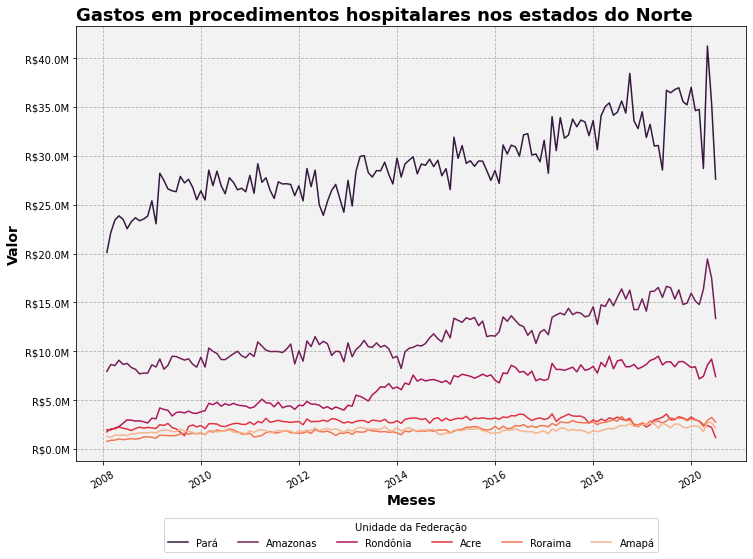

In [ ]:
plt.figure(figsize=(12,8))

ax = sns.lineplot(data=mensal_aberto_norte, x='mes', y='gasto', hue='uf', palette='rocket')

plt.xticks(rotation=30)

ax.yaxis.set_major_formatter(ticker.FuncFormatter(milhoes))
ax.set_facecolor("#f2f2f2")

ax.set_xlabel('Meses', fontsize= 14,color='black', fontweight='bold')
ax.set_ylabel('Valor', fontsize= 14,color='black', fontweight='bold')

plt.grid(linestyle='--')
plt.legend(bbox_to_anchor=(0.5,-0.22), loc = 'lower center',frameon=True, ncol=6, fancybox=True, title='Unidade da Federação')

plt.title('Gastos em procedimentos hospitalares nos estados do Norte', {'fontsize': 18, 'color': 'black', 'fontweight':'bold'}, loc='left')
plt.show()

---
##<font color = #944dff>  **Aula 5**
---

#### <font color = #8533ff> **5.1 - Comparando gastos ano a ano**

In [ ]:
mensal_aberto = mensal.reset_index().melt(id_vars=['index'], value_vars=mensal.columns)
mensal_aberto.columns = ['dia_mes_ano','uf', 'gasto']
mensal_aberto['dia_mes_ano'] = mensal_aberto['dia_mes_ano'].astype('datetime64')
mensal_aberto.head()

dia_mes_ano         uf        gasto
0  2008-02-01  São Paulo 172834914.73
1  2008-03-01  São Paulo 170481849.56
2  2008-04-01  São Paulo 170278285.95
3  2008-05-01  São Paulo 172402180.59
4  2008-06-01  São Paulo 175416595.83

In [ ]:
mensal_aberto.dtypes

dia_mes_ano    datetime64[ns]
uf                     object
gasto                 float64
dtype: object

In [ ]:
mensal_aberto['mes'] = mensal_aberto['dia_mes_ano'].dt.month
mensal_aberto['ano'] = mensal_aberto['dia_mes_ano'].dt.year
mensal_aberto.head()


dia_mes_ano         uf        gasto  mes   ano
0  2008-02-01  São Paulo 172834914.73    2  2008
1  2008-03-01  São Paulo 170481849.56    3  2008
2  2008-04-01  São Paulo 170278285.95    4  2008
3  2008-05-01  São Paulo 172402180.59    5  2008
4  2008-06-01  São Paulo 175416595.83    6  2008

Selecionando apenas um estado

In [ ]:
mensal_aberto.query('uf == "São Paulo"').head()

dia_mes_ano         uf        gasto  mes   ano
0  2008-02-01  São Paulo 172834914.73    2  2008
1  2008-03-01  São Paulo 170481849.56    3  2008
2  2008-04-01  São Paulo 170278285.95    4  2008
3  2008-05-01  São Paulo 172402180.59    5  2008
4  2008-06-01  São Paulo 175416595.83    6  2008

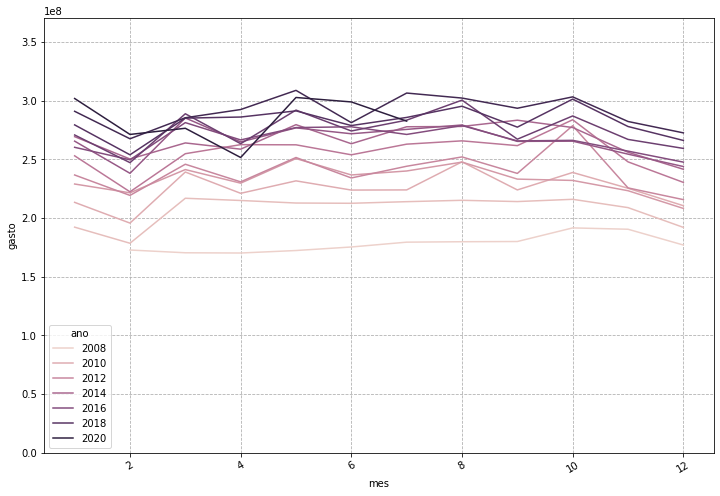

In [ ]:
plt.figure(figsize=(12,8))
ax = sns.lineplot(data=mensal_aberto.query('uf == "São Paulo"'), x='mes', y='gasto', hue='ano')
plt.xticks(rotation=30)
plt.ylim(0,max(mensal['São Paulo'])*1.2)
plt.grid(linestyle='--')
plt.show()


In [ ]:
dias_por_mes = {
    1 : 31,
    2 : 28,
    3 : 31,
    4 : 30,
    5 : 31,
    6 : 30,
    7 : 31,
    8 : 31,
    9 : 30,
    10 : 31,
    11 : 30,
    12 : 31
}

In [ ]:
mensal_aberto['gasto_diario'] = mensal_aberto['gasto'] / mensal_aberto['mes'].map(dias_por_mes)
mensal_aberto.head()

dia_mes_ano         uf        gasto  mes   ano  gasto_diario
0  2008-02-01  São Paulo 172834914.73    2  2008    6172675.53
1  2008-03-01  São Paulo 170481849.56    3  2008    5499414.50
2  2008-04-01  São Paulo 170278285.95    4  2008    5675942.86
3  2008-05-01  São Paulo 172402180.59    5  2008    5561360.66
4  2008-06-01  São Paulo 175416595.83    6  2008    5847219.86

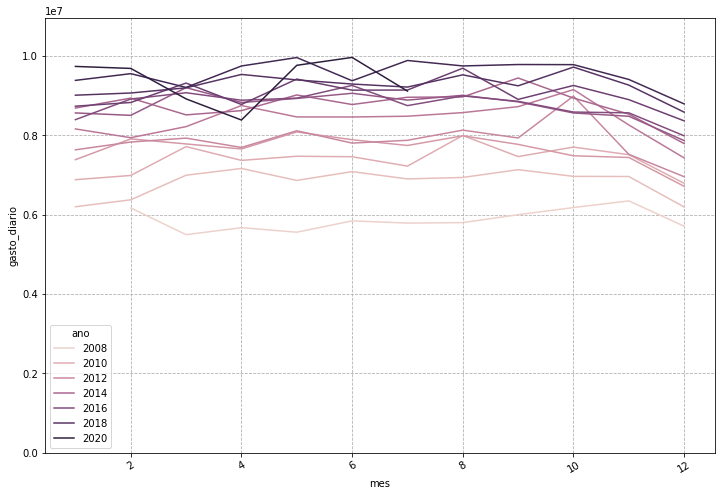

In [ ]:
plt.figure(figsize=(12,8))
ax = sns.lineplot(data=mensal_aberto.query('uf == "São Paulo"'), x='mes', y='gasto_diario', hue='ano')
plt.xticks(rotation=30)
plt.ylim(0,max(mensal_aberto.query('uf == "São Paulo"')['gasto_diario'])*1.1)
plt.grid(linestyle='--')
plt.show()


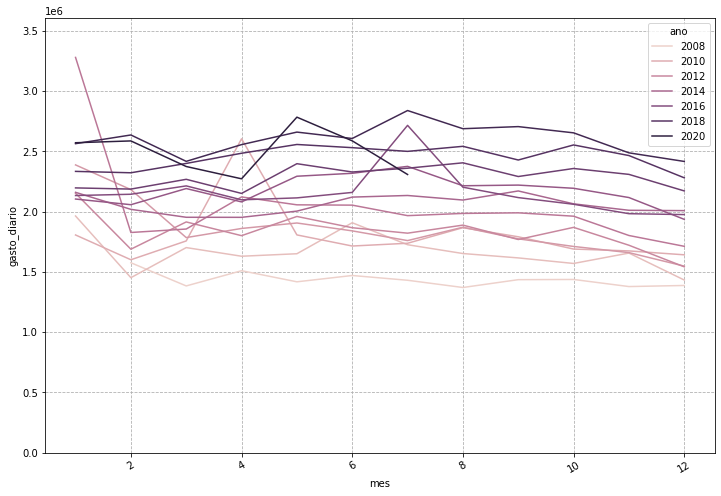

In [ ]:
plt.figure(figsize=(12,8))
ax = sns.lineplot(data=mensal_aberto.query('uf == "Rio de Janeiro"'), x='mes', y='gasto_diario', hue='ano')
plt.xticks(rotation=30)
plt.ylim(0,max(mensal_aberto.query('uf == "Rio de Janeiro"')['gasto_diario'])*1.1)
plt.grid(linestyle='--')
plt.show()


### <font color = #1f004d> **Desafios**

#### <font color = #1f004d> **Desafio 01: Melhorar o gráfico ano a ano: - Mudar a palete de cor, colocar um título descritivo, adicionar ticks com o nome de cada mês no eixo x.**

In [ ]:
from matplotlib.ticker import AutoMinorLocator

Uma forma de alterar os ticks é usar o dicionário meses que criamos anteriormente, passarmos uma lista com os valores para setarmos quais são nossos ticks e pegar os nomes com as chaves do dicionário.

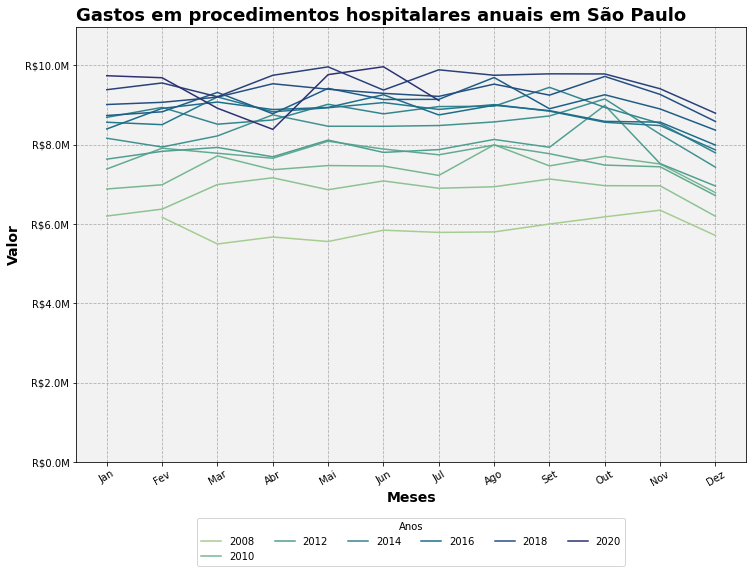

In [ ]:
plt.figure(figsize=(12,8))

ax = sns.lineplot(data=mensal_aberto.query('uf == "São Paulo"'), x='mes', y='gasto_diario', hue='ano', palette='crest')

ax.yaxis.set_major_formatter(ticker.FuncFormatter(milhoes))

plt.xticks(rotation=30)

ax.xaxis.set_ticks(list(meses.values()))
ax.set_xticklabels(meses.keys())

ax.set_facecolor("#f2f2f2")

plt.ylim(0,max(mensal_aberto.query('uf == "São Paulo"')['gasto_diario'])*1.1)

ax.set_xlabel('Meses', fontsize= 14,color='black', fontweight='bold')
ax.set_ylabel('Valor', fontsize= 14,color='black', fontweight='bold')

plt.grid(linestyle='--')
plt.legend(bbox_to_anchor=(0.5,-0.25), loc = 'lower center',frameon=True, ncol=6, fancybox=True, title='Anos')

plt.title('Gastos em procedimentos hospitalares anuais em São Paulo', {'fontsize': 18, 'color': 'black', 'fontweight':'bold'}, loc='left')
plt.show()

Outra forma é agora em inglês é importando a biblioteca calendário e passarmos uma lista da quantidade de ticks que queremos e a localização dos ticks

In [ ]:
import calendar

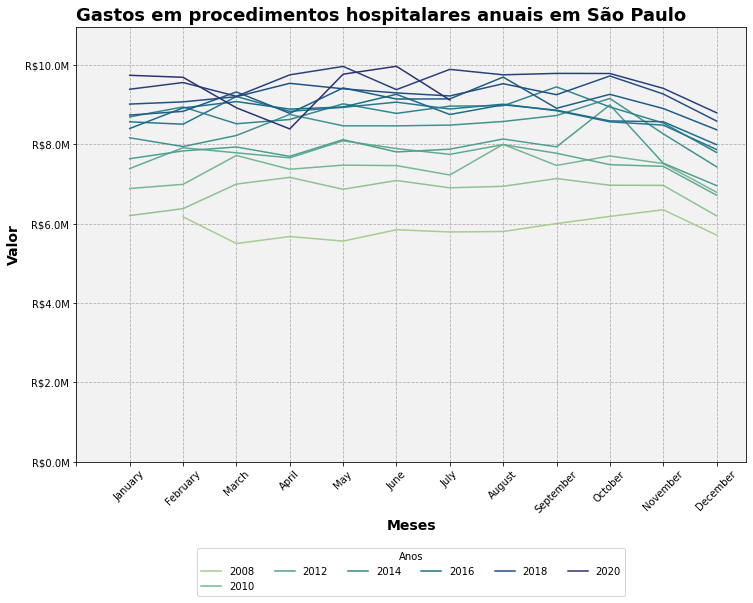

In [ ]:
plt.figure(figsize=(12,8))

ax = sns.lineplot(data=mensal_aberto.query('uf == "São Paulo"'), x='mes', y='gasto_diario', hue='ano', palette='crest')

ax.yaxis.set_major_formatter(ticker.FuncFormatter(milhoes))

plt.xticks(rotation=30)

plt.xticks(np.arange(13), calendar.month_name[0:13], rotation=45)

ax.set_facecolor("#f2f2f2")

plt.ylim(0,max(mensal_aberto.query('uf == "São Paulo"')['gasto_diario'])*1.1)

ax.set_xlabel('Meses', fontsize= 14,color='black', fontweight='bold')
ax.set_ylabel('Valor', fontsize= 14,color='black', fontweight='bold')

plt.grid(linestyle='--')
plt.legend(bbox_to_anchor=(0.5,-0.32), loc = 'lower center',frameon=True, ncol=6, fancybox=True, title='Anos')

plt.title('Gastos em procedimentos hospitalares anuais em São Paulo', {'fontsize': 18, 'color': 'black', 'fontweight':'bold'}, loc='left')
plt.show()

Em português com o numpy arrange.

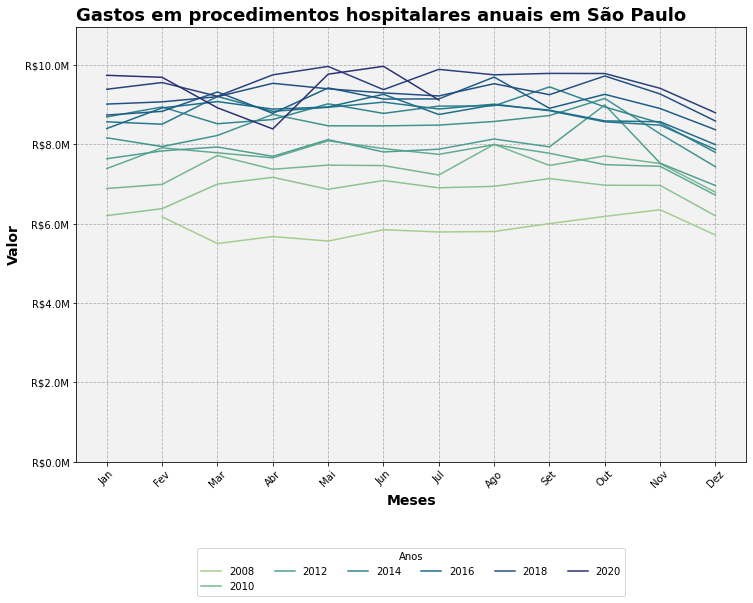

In [ ]:
plt.figure(figsize=(12,8))

ax = sns.lineplot(data=mensal_aberto.query('uf == "São Paulo"'), x='mes', y='gasto_diario', hue='ano', palette='crest')

ax.yaxis.set_major_formatter(ticker.FuncFormatter(milhoes))

plt.xticks(rotation=30)

plt.xticks(np.arange(1,13), meses.keys(), rotation=45)

ax.set_facecolor("#f2f2f2")

plt.ylim(0,max(mensal_aberto.query('uf == "São Paulo"')['gasto_diario'])*1.1)

ax.set_xlabel('Meses', fontsize= 14,color='black', fontweight='bold')
ax.set_ylabel('Valor', fontsize= 14,color='black', fontweight='bold')

plt.grid(linestyle='--')
plt.legend(bbox_to_anchor=(0.5,-0.32), loc = 'lower center',frameon=True, ncol=6, fancybox=True, title='Anos')

plt.title('Gastos em procedimentos hospitalares anuais em São Paulo', {'fontsize': 18, 'color': 'black', 'fontweight':'bold'}, loc='left')
plt.show()

#### <font color = #1f004d> **Desafio 02: Pegar estados de climas diferentes (por exemplo, norte e sul) e plotar o gráfico de linhas, comparar ambos e compartilhar suas análises.**

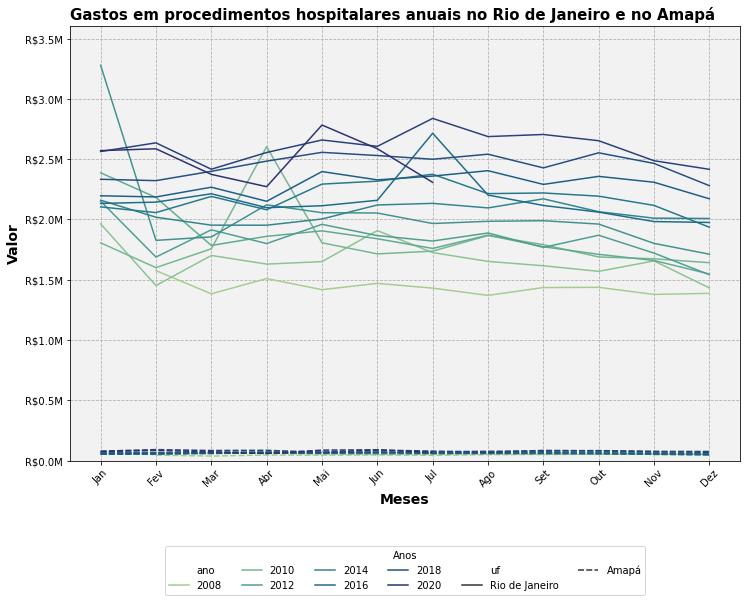

In [ ]:
plt.figure(figsize=(12,8))

ax = sns.lineplot(data=mensal_aberto.query('uf == "Rio de Janeiro" or uf == "Amapá"'), x='mes', y='gasto_diario', hue='ano', palette='crest', style='uf')

ax.yaxis.set_major_formatter(ticker.FuncFormatter(milhoes))

plt.xticks(rotation=30)

plt.xticks(np.arange(1,13), meses.keys(), rotation=45)

ax.set_facecolor("#f2f2f2")

plt.ylim(0,max(mensal_aberto.query('uf == "Rio de Janeiro"')['gasto_diario'])*1.1)

ax.set_xlabel('Meses', fontsize= 14,color='black', fontweight='bold')
ax.set_ylabel('Valor', fontsize= 14,color='black', fontweight='bold')

plt.grid(linestyle='--')
plt.legend(bbox_to_anchor=(0.5,-0.32), loc = 'lower center',frameon=True, ncol=6, fancybox=True, title='Anos')

plt.title('Gastos em procedimentos hospitalares anuais no Rio de Janeiro e no Amapá', {'fontsize': 15, 'color': 'black', 'fontweight':'bold'}, loc='left')
plt.show()

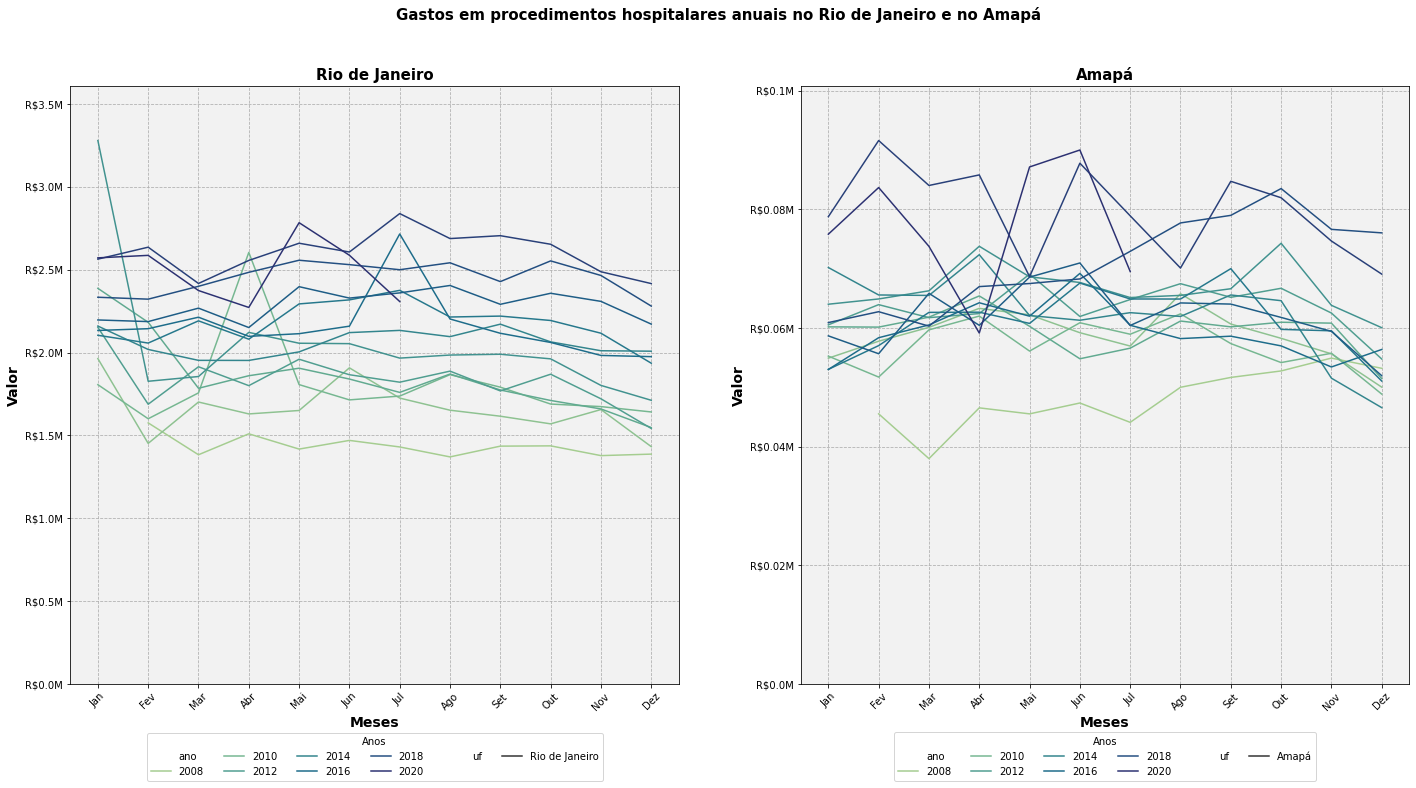

In [ ]:
plt.figure(figsize=(24,11))
### Primeiro Estado
plt.subplot(121)
ax = sns.lineplot(data=mensal_aberto.query('uf == "Rio de Janeiro"'), x='mes', y='gasto_diario', hue='ano', palette='crest', style='uf')

ax.yaxis.set_major_formatter(ticker.FuncFormatter(milhoes))

plt.xticks(rotation=30)

plt.xticks(np.arange(1,13), meses.keys(), rotation=45)

ax.set_facecolor("#f2f2f2")

plt.ylim(0,max(mensal_aberto.query('uf == "Rio de Janeiro"')['gasto_diario'])*1.1)

ax.set_xlabel('Meses', fontsize= 14,color='black', fontweight='bold')
ax.set_ylabel('Valor', fontsize= 14,color='black', fontweight='bold')

plt.grid(linestyle='--')
plt.legend(bbox_to_anchor=(0.5,-0.17), loc = 'lower center',frameon=True, ncol=6, fancybox=True, title='Anos')
plt.title('Rio de Janeiro', {'fontsize': 15, 'color': 'black', 'fontweight':'bold'}, loc='center')


#Segundo Estado
plt.subplot(122)
ax = sns.lineplot(data=mensal_aberto.query('uf == "Amapá"'), x='mes', y='gasto_diario', hue='ano', palette='crest', style='uf')

ax.yaxis.set_major_formatter(ticker.FuncFormatter(milhoes))

plt.xticks(rotation=30)

plt.xticks(np.arange(1,13), meses.keys(), rotation=45)

ax.set_facecolor("#f2f2f2")

plt.ylim(0,max(mensal_aberto.query('uf == "Amapá"')['gasto_diario'])*1.1)

ax.set_xlabel('Meses', fontsize= 14,color='black', fontweight='bold')
ax.set_ylabel('Valor', fontsize= 14,color='black', fontweight='bold')

plt.grid(linestyle='--')
plt.legend(bbox_to_anchor=(0.5,-0.17), loc = 'lower center',frameon=True, ncol=6, fancybox=True, title='Anos')

plt.title('Amapá', {'fontsize': 15, 'color': 'black', 'fontweight':'bold'}, loc='center')

plt.suptitle('Gastos em procedimentos hospitalares anuais no Rio de Janeiro e no Amapá', fontsize= 15,fontweight='bold', ha = 'center')
plt.show()

Eu mudei as escalas de propósito a fim de verificar a diferença entre os anos do Amapá, caso contrário seria impossível verificarmos, já que o maior gasto do Amapá não cheg aos pés do Rio de Janeiro.

---
##<font color = #944dff>  **Aula 6**
---

#### <font color = #8533ff> **5.1 - Avançando em pandas e seaborn**

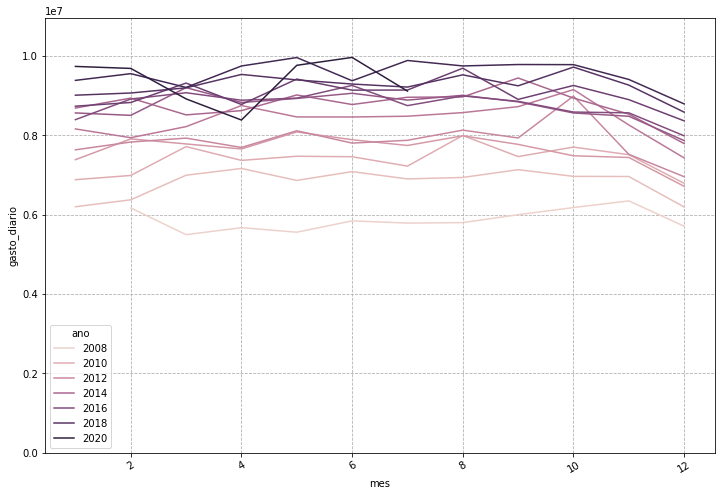

In [ ]:
plt.figure(figsize=(12,8))
ax = sns.lineplot(data=mensal_aberto.query('uf == "São Paulo"'), x='mes', y='gasto_diario', hue='ano')
plt.xticks(rotation=30)
plt.ylim(0,max(mensal_aberto.query('uf == "São Paulo"')['gasto_diario'])*1.1)
plt.grid(linestyle='--')
plt.show()

In [ ]:
estado_a_analisar = mensal_aberto.query('uf == "São Paulo"')
estado_a_analisar.head()

dia_mes_ano         uf        gasto  mes   ano  gasto_diario
0  2008-02-01  São Paulo 172834914.73    2  2008    6172675.53
1  2008-03-01  São Paulo 170481849.56    3  2008    5499414.50
2  2008-04-01  São Paulo 170278285.95    4  2008    5675942.86
3  2008-05-01  São Paulo 172402180.59    5  2008    5561360.66
4  2008-06-01  São Paulo 175416595.83    6  2008    5847219.86

Como não nos importa o mês, retirei ele do carregamento dos gastos por ano.

In [ ]:
gastos_por_ano = estado_a_analisar.groupby('ano').sum()[['gasto','gasto_diario']]
gastos_por_ano.head()

gasto  gasto_diario
ano                             
2008 1960230442.26   64600828.91
2009 2489030484.83   81823449.01
2010 2696622949.86   88626495.26
2011 2794549339.77   91905424.14
2012 2873973262.98   94466122.27

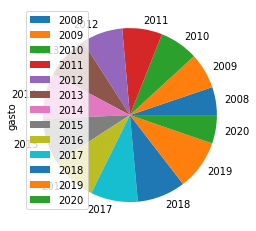

In [ ]:
gastos_por_ano.plot(kind='pie', y='gasto')

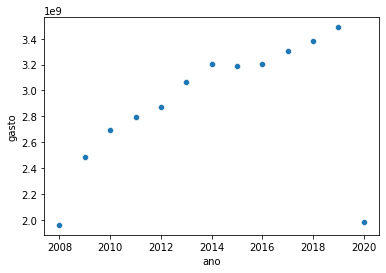

In [ ]:
sns.scatterplot(data=gastos_por_ano, x=gastos_por_ano.index, y='gasto')

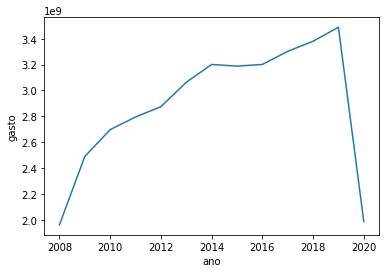

In [ ]:
sns.lineplot(data=gastos_por_ano, x=gastos_por_ano.index, y='gasto')

Lembrando que já utilizei a quantidade de tons e agora reforcei o conhecimento.

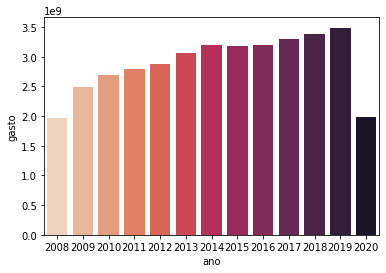

In [ ]:
sns.barplot(data=gastos_por_ano, x=gastos_por_ano.index, y='gasto', palette=sns.color_palette('rocket_r', 13))

In [ ]:
estados = ['São Paulo', 'Minas Gerais', 'Pernambuco']
por_ano_dos_estados = mensal_aberto.query('uf in @estados').groupby(['uf','ano']).sum().reset_index()
por_ano_dos_estados.head()

uf   ano         gasto  mes  gasto_diario
0  Minas Gerais  2008  894346731.42   77   29442915.97
1  Minas Gerais  2009 1149141349.15   78   37767441.61
2  Minas Gerais  2010 1217493124.37   78   40025073.84
3  Minas Gerais  2011 1315021864.36   78   43242529.34
4  Minas Gerais  2012 1408354148.98   78   46290727.60

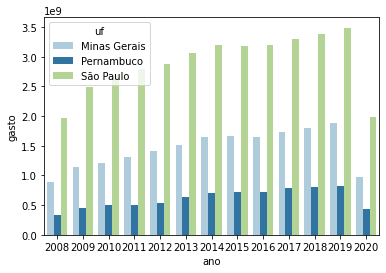

In [ ]:
sns.barplot(data=por_ano_dos_estados, x='ano', y='gasto', palette=sns.color_palette('Paired'),
            hue='uf')

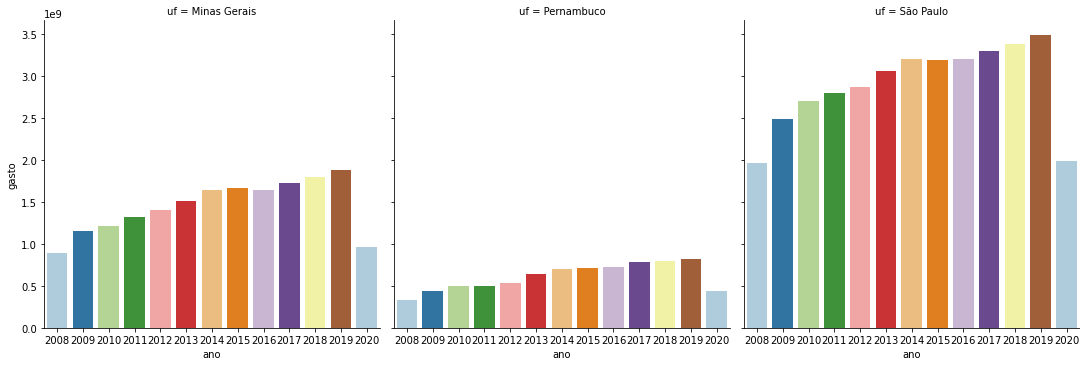

In [ ]:
sns.catplot(data=por_ano_dos_estados, x='ano', y='gasto', palette=sns.color_palette('Paired'),
            col='uf', kind='bar')

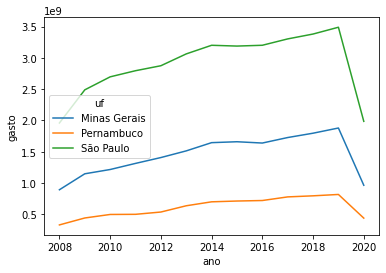

In [ ]:
sns.lineplot(data=por_ano_dos_estados, x='ano', y='gasto', 
            hue='uf')

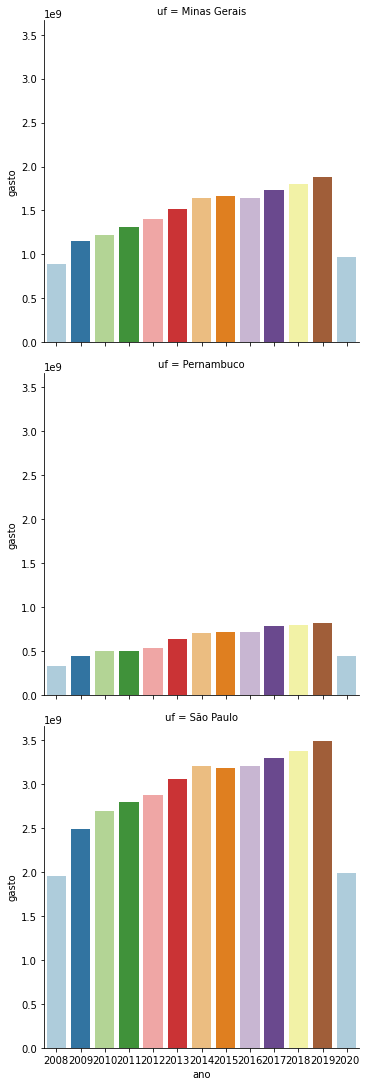

In [ ]:
sns.catplot(data=por_ano_dos_estados, x='ano', y='gasto', palette=sns.color_palette('Paired'),
            row='uf', kind='bar')

### <font color = #1f004d> **Desafios**

#### <font color = #1f004d> **Desafio 01: Reordenar as cores pelo valor do eixo y.**

Para ordenar as cores, irei criar um dicionário com os valores dos índices ordenados do menor par ao maior e as cores respectivas.

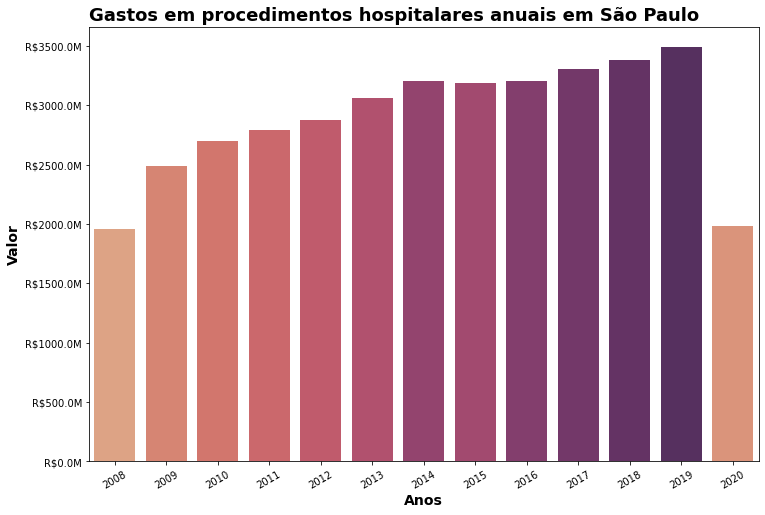

In [ ]:
plt.figure(figsize=(12,8))

paleta = dict(zip(gastos_por_ano.sort_values(by='gasto', ascending=True).index.unique(), sns.color_palette('flare', 13)))

ax = sns.barplot(data=gastos_por_ano, x=gastos_por_ano.index, y='gasto', palette=paleta)

ax.yaxis.set_major_formatter(ticker.FuncFormatter(milhoes))

plt.xticks(rotation=30)



ax.set_xlabel('Anos', fontsize= 14,color='black', fontweight='bold')
ax.set_ylabel('Valor', fontsize= 14,color='black', fontweight='bold')



plt.title('Gastos em procedimentos hospitalares anuais em São Paulo', {'fontsize': 18, 'color': 'black', 'fontweight':'bold'}, loc='left')
plt.show()

#### <font color = #1f004d> **Desafio 02: Explorar a documentação do Seaborn.**



#### <font color = #1f004d> **Desafio 03: Pensar e elaborar novos gráficos depois de estudar o Seaborn, compartilhar com uma breve descrição no Discord, para que outros colegas aprendam sobre o gráfico usado.**



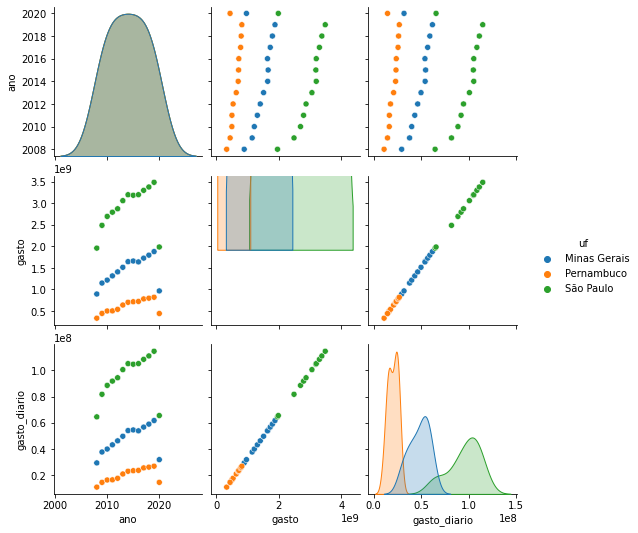

In [ ]:
ax = sns.pairplot(data=por_ano_dos_estados[['uf','ano','gasto','gasto_diario']], hue='uf')

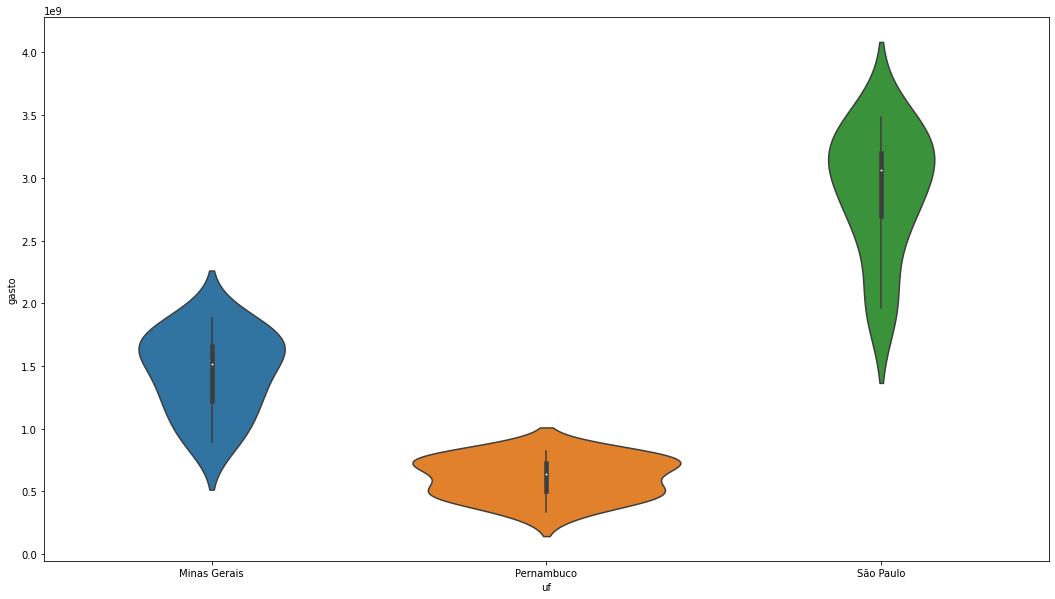

In [ ]:
plt.figure(figsize=(18,10))
ax = sns.violinplot(data=por_ano_dos_estados[['uf','ano','gasto','gasto_diario']], x = 'uf', y='gasto',kind='bar',col='ano')

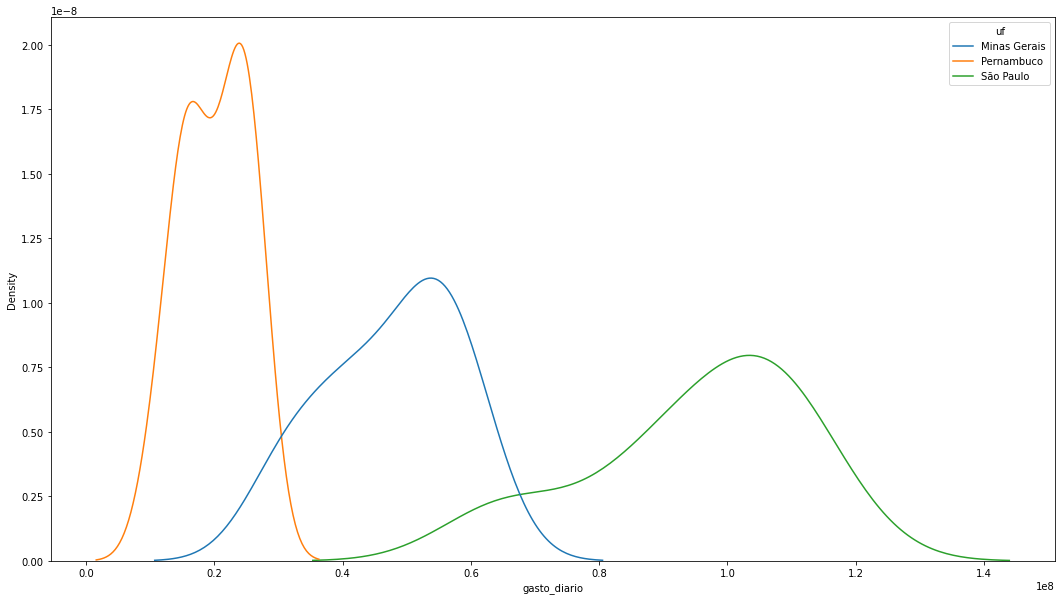

In [ ]:
plt.figure(figsize=(18,10))
ax = sns.kdeplot(data=por_ano_dos_estados, x = 'gasto_diario', hue='uf', label='uf')


#### <font color = #1f004d> **Desafio 04: Baixe uma outra base de dados do tabnet e execute sua análise de forma similar a aula.**



TBD